In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.colors as colors

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import class_weight

from imblearn.over_sampling import SMOTE



pd.set_option("display.max_columns", None)

In [2]:
# Ler do dataframe original
"""df = pd.read_csv("../data/dados.csv", encoding="ISO-8859-1", sep=";", low_memory=False)
print(f'Linhas, Colunas: {df.shape} \n')
print(f'Informações: \n')
print(f'{df.info()}\n')"""


'df = pd.read_csv("../data/dados.csv", encoding="ISO-8859-1", sep=";", low_memory=False)\nprint(f\'Linhas, Colunas: {df.shape} \n\')\nprint(f\'Informações: \n\')\nprint(f\'{df.info()}\n\')'

In [3]:
#Overview do dataset
""" df.info() """

' df.info() '

In [4]:
#Carrega o dataset de taxas de rendimento
""" df_tx = pd.read_excel("../data/tx_rend.xlsx", skiprows = 8, nrows = 129307)
print(f'Linhas, Colunas: {df_tx.shape} \n')
print(f'Informações: \n')
print(f'{df_tx.info()}\n') """


' df_tx = pd.read_excel("../data/tx_rend.xlsx", skiprows = 8, nrows = 129307)\nprint(f\'Linhas, Colunas: {df_tx.shape} \n\')\nprint(f\'Informações: \n\')\nprint(f\'{df_tx.info()}\n\') '

In [5]:
#Dados os datatypes criados a partir dos dois datasets:
""" df.info()
df_tx.info() """

' df.info()\ndf_tx.info() '

In [6]:
# Criar a lista de entidade para cada uma das bases
""" lista_co_entidades_microdados = pd.Series(df['CO_ENTIDADE'].to_list())
lista_co_entidades_tx_rend = pd.Series(df_tx['CO_ENTIDADE'].to_list())
print(f'O dataset de microdados possui {len(lista_co_entidades_microdados)} códigos de entidade, enquanto o dataset de taxa de rendimentos possui {len(lista_co_entidades_tx_rend)} códigos.\n')

#Obtendo os códigos presentes em um dataset mas ausente em outro
codigos_diferentes = [cod for cod in lista_co_entidades_microdados.to_list() if cod not in lista_co_entidades_tx_rend.to_list()]
 """

" lista_co_entidades_microdados = pd.Series(df['CO_ENTIDADE'].to_list())\nlista_co_entidades_tx_rend = pd.Series(df_tx['CO_ENTIDADE'].to_list())\nprint(f'O dataset de microdados possui {len(lista_co_entidades_microdados)} códigos de entidade, enquanto o dataset de taxa de rendimentos possui {len(lista_co_entidades_tx_rend)} códigos.\n')\n\n#Obtendo os códigos presentes em um dataset mas ausente em outro\ncodigos_diferentes = [cod for cod in lista_co_entidades_microdados.to_list() if cod not in lista_co_entidades_tx_rend.to_list()]\n "

In [7]:
#Total de códigos diferentes
""" len(codigos_diferentes) """

' len(codigos_diferentes) '

In [8]:
#Criando um novo dataframe filtrando os microdados apenas para aqueles que não possuem CO_ENTIDADE que não 
#tem correspondente na base de taxa de rendimento
""" df_microdados = df.query('CO_ENTIDADE not in @codigos_diferentes').reset_index(drop=True)
df_microdados.info() """

" df_microdados = df.query('CO_ENTIDADE not in @codigos_diferentes').reset_index(drop=True)\ndf_microdados.info() "

In [9]:
#Seleciona as colunas relevantes a partir de seus índices
""" indices_col_tx = [5,45,57]
df_tx_filtrado = df_tx.iloc[:,indices_col_tx] """

' indices_col_tx = [5,45,57]\ndf_tx_filtrado = df_tx.iloc[:,indices_col_tx] '

In [10]:
""" #Renomeia as colunas do Dataframe alvo para ficarem com valores mais claros
df_tx_filtrado = df_tx_filtrado.rename(columns={"3_CAT_FUN" : "ABAND_FUND", "3_CAT_MED" : "ABAND_MED"})
df_tx_filtrado """

' #Renomeia as colunas do Dataframe alvo para ficarem com valores mais claros\ndf_tx_filtrado = df_tx_filtrado.rename(columns={"3_CAT_FUN" : "ABAND_FUND", "3_CAT_MED" : "ABAND_MED"})\ndf_tx_filtrado '

In [11]:
""" #Filtra as colunas selecionadas apenas do dataset de microdados:
indices_col_microdados = ['CO_ENTIDADE', 'IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES',
                         'IN_REFEITORIO', 'IN_LABORATORIO_EDUC_PROF', 'IN_SALA_MULTIUSO', 'IN_SALA_REPOUSO_ALUNO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'QT_SALAS_UTILIZADAS', 'QT_SALAS_UTILIZA_CLIMATIZADAS', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM',
                         'IN_INTERNET_COMUNIDADE', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', 
                          'IN_ESPACO_ATIVIDADE', 'IN_FUND', 'IN_MED']
df_microdados_filtrado = df_microdados.loc[:,indices_col_microdados]
df_microdados_filtrado """

" #Filtra as colunas selecionadas apenas do dataset de microdados:\nindices_col_microdados = ['CO_ENTIDADE', 'IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES',\n                         'IN_REFEITORIO', 'IN_LABORATORIO_EDUC_PROF', 'IN_SALA_MULTIUSO', 'IN_SALA_REPOUSO_ALUNO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'QT_SALAS_UTILIZADAS', 'QT_SALAS_UTILIZA_CLIMATIZADAS', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM',\n                         'IN_INTERNET_COMUNIDADE', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', \n                          'IN_ESPACO_ATIVIDADE', 'IN_FUND', 'IN_MED']\ndf_microdados_filtrado = df_microdados.loc[:,indices_col_microdados]\ndf_microdados_filtrado "

In [12]:
# Salva os dataframes em arquivos, para um checkpoint
""" df_tx_filtrado.to_pickle("../data/tx_aband.pk1")
df_microdados_filtrado.to_feather("../data/microdados.feather")
df_tx_filtrado.info()
df_microdados_filtrado.info() """

' df_tx_filtrado.to_pickle("../data/tx_aband.pk1")\ndf_microdados_filtrado.to_feather("../data/microdados.feather")\ndf_tx_filtrado.info()\ndf_microdados_filtrado.info() '

In [13]:
#Carrega do backup
df_tx_use = pd.read_pickle("../data/tx_aband.pk1")
df_mc_use = pd.read_feather("../data/microdados.feather")

df_microdados = df_mc_use.copy()
df_tx = df_tx_use.copy()
df_tx.info()
df_microdados.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129307 entries, 0 to 129306
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CO_ENTIDADE  129307 non-null  int64 
 1   ABAND_FUND   129307 non-null  object
 2   ABAND_MED    129307 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129307 entries, 0 to 129306
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CO_ENTIDADE                    129307 non-null  int64  
 1   IN_AGUA_POTAVEL                129307 non-null  float64
 2   IN_ENERGIA_INEXISTENTE         129307 non-null  float64
 3   IN_ESGOTO_INEXISTENTE          129307 non-null  float64
 4   IN_BANHEIRO                    129307 non-null  float64
 5   IN_BIBLIOTECA_SALA_LEITURA     129307 non-null  float64
 6   IN_COZINHA                

In [56]:
df_microdados.columns

Index(['CO_ENTIDADE', 'IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE',
       'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA',
       'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
       'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO',
       'IN_LABORATORIO_EDUC_PROF', 'IN_SALA_MULTIUSO', 'IN_SALA_REPOUSO_ALUNO',
       'IN_ACESSIBILIDADE_INEXISTENTE', 'QT_SALAS_UTILIZADAS',
       'QT_SALAS_UTILIZA_CLIMATIZADAS', 'IN_DESKTOP_ALUNO',
       'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET',
       'IN_INTERNET_APRENDIZAGEM', 'IN_INTERNET_COMUNIDADE',
       'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO',
       'IN_ESPACO_ATIVIDADE', 'IN_FUND', 'IN_MED', 'ABAND_FUND', 'ABAND_MED'],
      dtype='object')

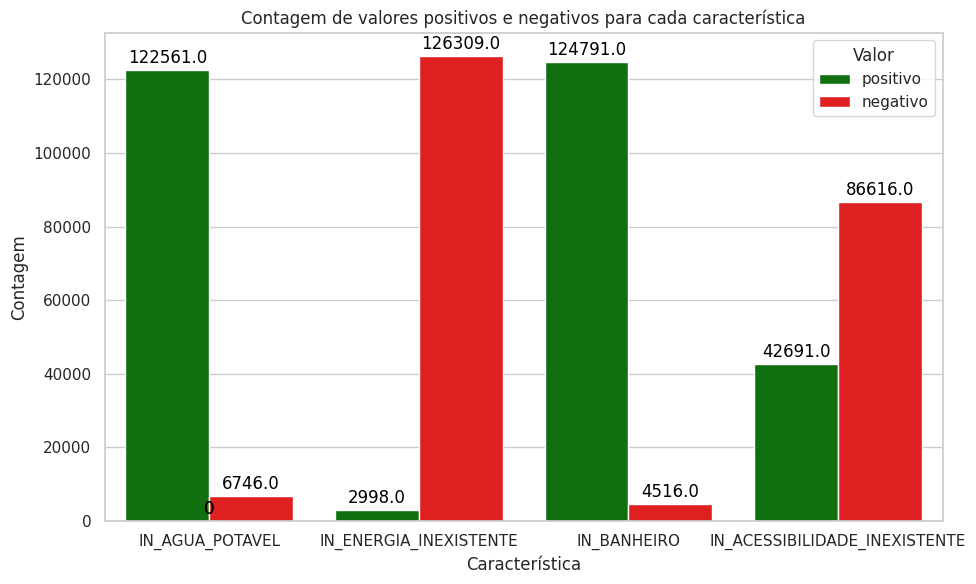

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_microdados seja o seu DataFrame original
# Seleção das colunas binárias
columns_dt = ['IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_BANHEIRO', 'IN_ACESSIBILIDADE_INEXISTENTE']

# Configurar o estilo do seaborn para gráficos mais bonitos
sns.set_theme(style="whitegrid")

# Função para mapear 0 e 1 para 'negativo' e 'positivo'
def map_labels(value):
    return 'negativo' if value == 0 else 'positivo'

# Preparar os dados para o gráfico agrupado
df_melted = pd.DataFrame()

for col in columns_dt:
    temp_df = df_microdados[[col]].copy()
    temp_df['Feature'] = col
    temp_df['Value'] = temp_df[col].map(map_labels)
    df_melted = pd.concat([df_melted, temp_df], axis=0)

# Definindo a paleta de cores personalizada
palette = {'negativo': 'red', 'positivo': 'green'}

# Plotar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_melted, x='Feature', hue='Value', palette=palette, )

# Adicionar rótulos de contagem em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Contagem de valores positivos e negativos para cada característica')
plt.xlabel('Característica')
plt.ylabel('Contagem')
plt.legend(title='Valor')
plt.tight_layout()
plt.show()


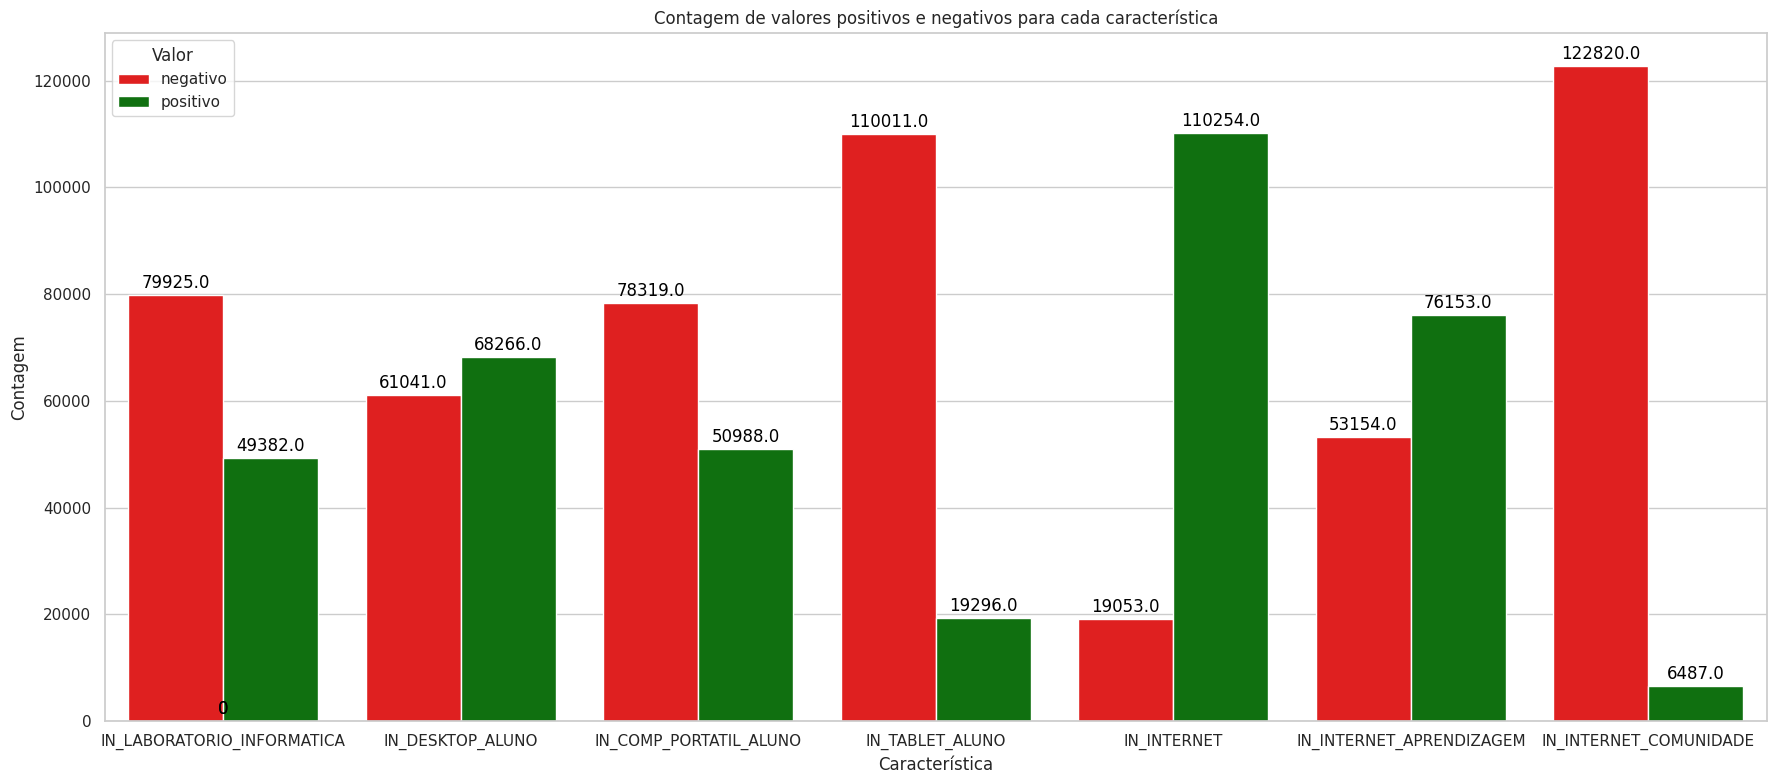

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_microdados seja o seu DataFrame original
# Seleção das colunas binárias
columns_dt = ['IN_LABORATORIO_INFORMATICA', 'IN_DESKTOP_ALUNO',
       'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET',
       'IN_INTERNET_APRENDIZAGEM', 'IN_INTERNET_COMUNIDADE',
       ]

# Configurar o estilo do seaborn para gráficos mais bonitos
sns.set_theme(style="whitegrid")

# Função para mapear 0 e 1 para 'negativo' e 'positivo'
def map_labels(value):
    return 'negativo' if value == 0 else 'positivo'

# Preparar os dados para o gráfico agrupado
df_melted = pd.DataFrame()

for col in columns_dt:
    temp_df = df_microdados[[col]].copy()
    temp_df['Feature'] = col
    temp_df['Value'] = temp_df[col].map(map_labels)
    df_melted = pd.concat([df_melted, temp_df], axis=0)

# Definindo a paleta de cores personalizada
palette = {'negativo': 'red', 'positivo': 'green'}

# Plotar o gráfico de barras agrupado
plt.figure(figsize=(18, 8))

ax = sns.countplot(data=df_melted, x='Feature', hue='Value', palette=palette, )

# Adicionar rótulos de contagem em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Contagem de valores positivos e negativos para cada característica')
plt.xlabel('Característica')
plt.ylabel('Contagem')
plt.legend(title='Valor')
plt.tight_layout()
plt.show()


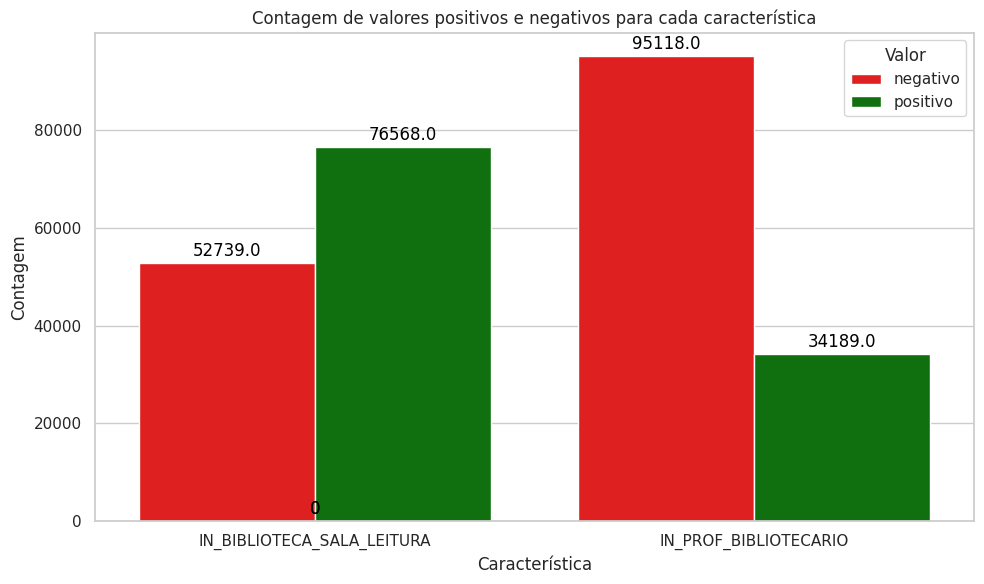

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_microdados seja o seu DataFrame original
# Seleção das colunas binárias
columns_dt = ['IN_BIBLIOTECA_SALA_LEITURA', 'IN_PROF_BIBLIOTECARIO']

# Configurar o estilo do seaborn para gráficos mais bonitos
sns.set_theme(style="whitegrid")

# Função para mapear 0 e 1 para 'negativo' e 'positivo'
def map_labels(value):
    return 'negativo' if value == 0 else 'positivo'

# Preparar os dados para o gráfico agrupado
df_melted = pd.DataFrame()

for col in columns_dt:
    temp_df = df_microdados[[col]].copy()
    temp_df['Feature'] = col
    temp_df['Value'] = temp_df[col].map(map_labels)
    df_melted = pd.concat([df_melted, temp_df], axis=0)

# Definindo a paleta de cores personalizada
palette = {'negativo': 'red', 'positivo': 'green'}

# Plotar o gráfico de barras agrupado
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_melted, x='Feature', hue='Value', palette=palette, )

# Adicionar rótulos de contagem em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Contagem de valores positivos e negativos para cada característica')
plt.xlabel('Característica')
plt.ylabel('Contagem')
plt.legend(title='Valor')
plt.tight_layout()
plt.show()


In [14]:
#Produz um dataframe unindo a partir da coluna de CO_ENTIDADE
df_microdados = pd.merge(df_microdados, df_tx, on="CO_ENTIDADE")
df_microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129307 entries, 0 to 129306
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CO_ENTIDADE                    129307 non-null  int64  
 1   IN_AGUA_POTAVEL                129307 non-null  float64
 2   IN_ENERGIA_INEXISTENTE         129307 non-null  float64
 3   IN_ESGOTO_INEXISTENTE          129307 non-null  float64
 4   IN_BANHEIRO                    129307 non-null  float64
 5   IN_BIBLIOTECA_SALA_LEITURA     129307 non-null  float64
 6   IN_COZINHA                     129307 non-null  float64
 7   IN_LABORATORIO_CIENCIAS        129307 non-null  float64
 8   IN_LABORATORIO_INFORMATICA     129307 non-null  float64
 9   IN_PARQUE_INFANTIL             129307 non-null  float64
 10  IN_QUADRA_ESPORTES             129307 non-null  float64
 11  IN_REFEITORIO                  129307 non-null  float64
 12  IN_LABORATORIO_EDUC_PROF      

In [15]:
df_microdados

,CO_ENTIDADE,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_BANHEIRO,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PARQUE_INFANTIL,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_LABORATORIO_EDUC_PROF,IN_SALA_MULTIUSO,IN_SALA_REPOUSO_ALUNO,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,IN_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_PROF_BIBLIOTECARIO,IN_PROF_SAUDE,IN_ALIMENTACAO,IN_ESPACO_ATIVIDADE,IN_FUND,IN_MED,ABAND_FUND,ABAND_MED
0,11022558,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,--
1,11024291,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,--
2,11024372,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,9.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,--
3,11024666,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,--
4,11024682,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36.0,12.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.7,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129302,53084020,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,--
129303,53084039,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0,--
129304,53084055,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0
129305,53085000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,20.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,--


In [16]:
#Dividir as bases que tem fund e as que não tem IN_FUND e IN_MED
df_microdados_fund = df_microdados.query('IN_FUND == 1').reset_index(drop=True)
df_microdados_med = df_microdados.query('IN_MED == 1').reset_index(drop=True)

#Remover as colunas de indicador já que a divisão já foi feita
df_microdados_fund = df_microdados_fund.drop(['IN_FUND', 'IN_MED', 'ABAND_MED' ], axis =1)
df_microdados_med = df_microdados_med.drop(['IN_FUND', 'IN_MED', 'ABAND_FUND' ], axis =1)

df_microdados_fund['ABAND_FUND'] = df_microdados_fund['ABAND_FUND'].replace('--', 0)
df_microdados_med['ABAND_MED'] = df_microdados_med['ABAND_MED'].replace('--', 0)
df_microdados_fund['ABAND_FUND'] = df_microdados_fund['ABAND_FUND'].astype('float')
df_microdados_med['ABAND_MED'] = df_microdados_med['ABAND_MED'].astype('float')

In [17]:
df_microdados_fund.head()

,CO_ENTIDADE,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_BANHEIRO,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PARQUE_INFANTIL,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_LABORATORIO_EDUC_PROF,IN_SALA_MULTIUSO,IN_SALA_REPOUSO_ALUNO,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,IN_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_PROF_BIBLIOTECARIO,IN_PROF_SAUDE,IN_ALIMENTACAO,IN_ESPACO_ATIVIDADE,ABAND_FUND
0,11022558,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,11024291,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,11024372,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,9.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,11024666,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,11024682,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36.0,12.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.7


In [18]:
df_microdados_med.info(max_cols =1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29384 entries, 0 to 29383
Columns: 29 entries, CO_ENTIDADE to ABAND_MED
dtypes: float64(28), int64(1)
memory usage: 6.5 MB


In [19]:
#Estatísticas básicas das variáveis instituições fundamental
df_microdados_fund.describe(include = 'all')

,CO_ENTIDADE,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_BANHEIRO,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PARQUE_INFANTIL,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_LABORATORIO_EDUC_PROF,IN_SALA_MULTIUSO,IN_SALA_REPOUSO_ALUNO,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,IN_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_PROF_BIBLIOTECARIO,IN_PROF_SAUDE,IN_ALIMENTACAO,IN_ESPACO_ATIVIDADE,ABAND_FUND
count,1.208560e+05,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.00000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000
mean,2.948470e+07,0.946689,0.024699,0.053502,0.964255,0.573426,0.918349,0.134971,0.361546,0.27153,0.457727,0.416065,0.002540,0.082379,0.017153,0.336069,8.934534,3.143692,0.509697,0.387072,0.146000,0.846238,0.580219,0.046675,0.253955,0.033188,0.831858,0.871235,1.271425
std,9.957755e+06,0.224655,0.155206,0.225033,0.185655,0.494581,0.273833,0.341694,0.480450,0.44475,0.498212,0.492907,0.050337,0.274942,0.129841,0.472365,7.502730,6.179498,0.499908,0.487082,0.353108,0.360721,0.493525,0.210943,0.435274,0.179129,0.373994,1.890061,3.937556
min,1.100006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.213393e+07,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.932659e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.513424e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,12.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.800000
max,5.308601e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,312.000000,117.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,100.000000


In [20]:
#Estatísticas básicas das variáveis instituições med
df_microdados_med.describe(include = 'all')

,CO_ENTIDADE,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_BANHEIRO,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PARQUE_INFANTIL,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_LABORATORIO_EDUC_PROF,IN_SALA_MULTIUSO,IN_SALA_REPOUSO_ALUNO,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,IN_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_PROF_BIBLIOTECARIO,IN_PROF_SAUDE,IN_ALIMENTACAO,IN_ESPACO_ATIVIDADE,ABAND_MED
count,2.938400e+04,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.00000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000
mean,3.267633e+07,0.975871,0.003778,0.012013,0.986796,0.880377,0.907433,0.483222,0.697080,0.213960,0.772053,0.541111,0.025150,0.150898,0.026545,0.242275,14.56786,6.101960,0.799415,0.564695,0.223115,0.967465,0.800538,0.080996,0.491152,0.083106,0.725633,0.723319,4.535849
std,9.545575e+06,0.153452,0.061347,0.108947,0.114151,0.324526,0.289830,0.499727,0.459529,0.410106,0.419515,0.498316,0.156582,0.357956,0.160752,0.428467,10.13520,9.615673,0.400445,0.495805,0.416342,0.177418,0.399603,0.272834,0.499930,0.276048,0.446202,1.662303,7.466137
min,1.100006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.616898e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.308866e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.100000
75%,3.592001e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.00000,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,6.600000
max,5.308601e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,262.00000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,100.000000


In [21]:
#Analise descritiva para a variável alvo fundamental
df_microdados_fund['ABAND_FUND'].describe()

count    120856.000000
mean          1.271425
std           3.937556
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         100.000000
Name: ABAND_FUND, dtype: float64

In [22]:
#Analise descritiva para a variável alvo médio
df_microdados_med['ABAND_MED'].describe()

count    29384.000000
mean         4.535849
std          7.466137
min          0.000000
25%          0.000000
50%          1.100000
75%          6.600000
max        100.000000
Name: ABAND_MED, dtype: float64

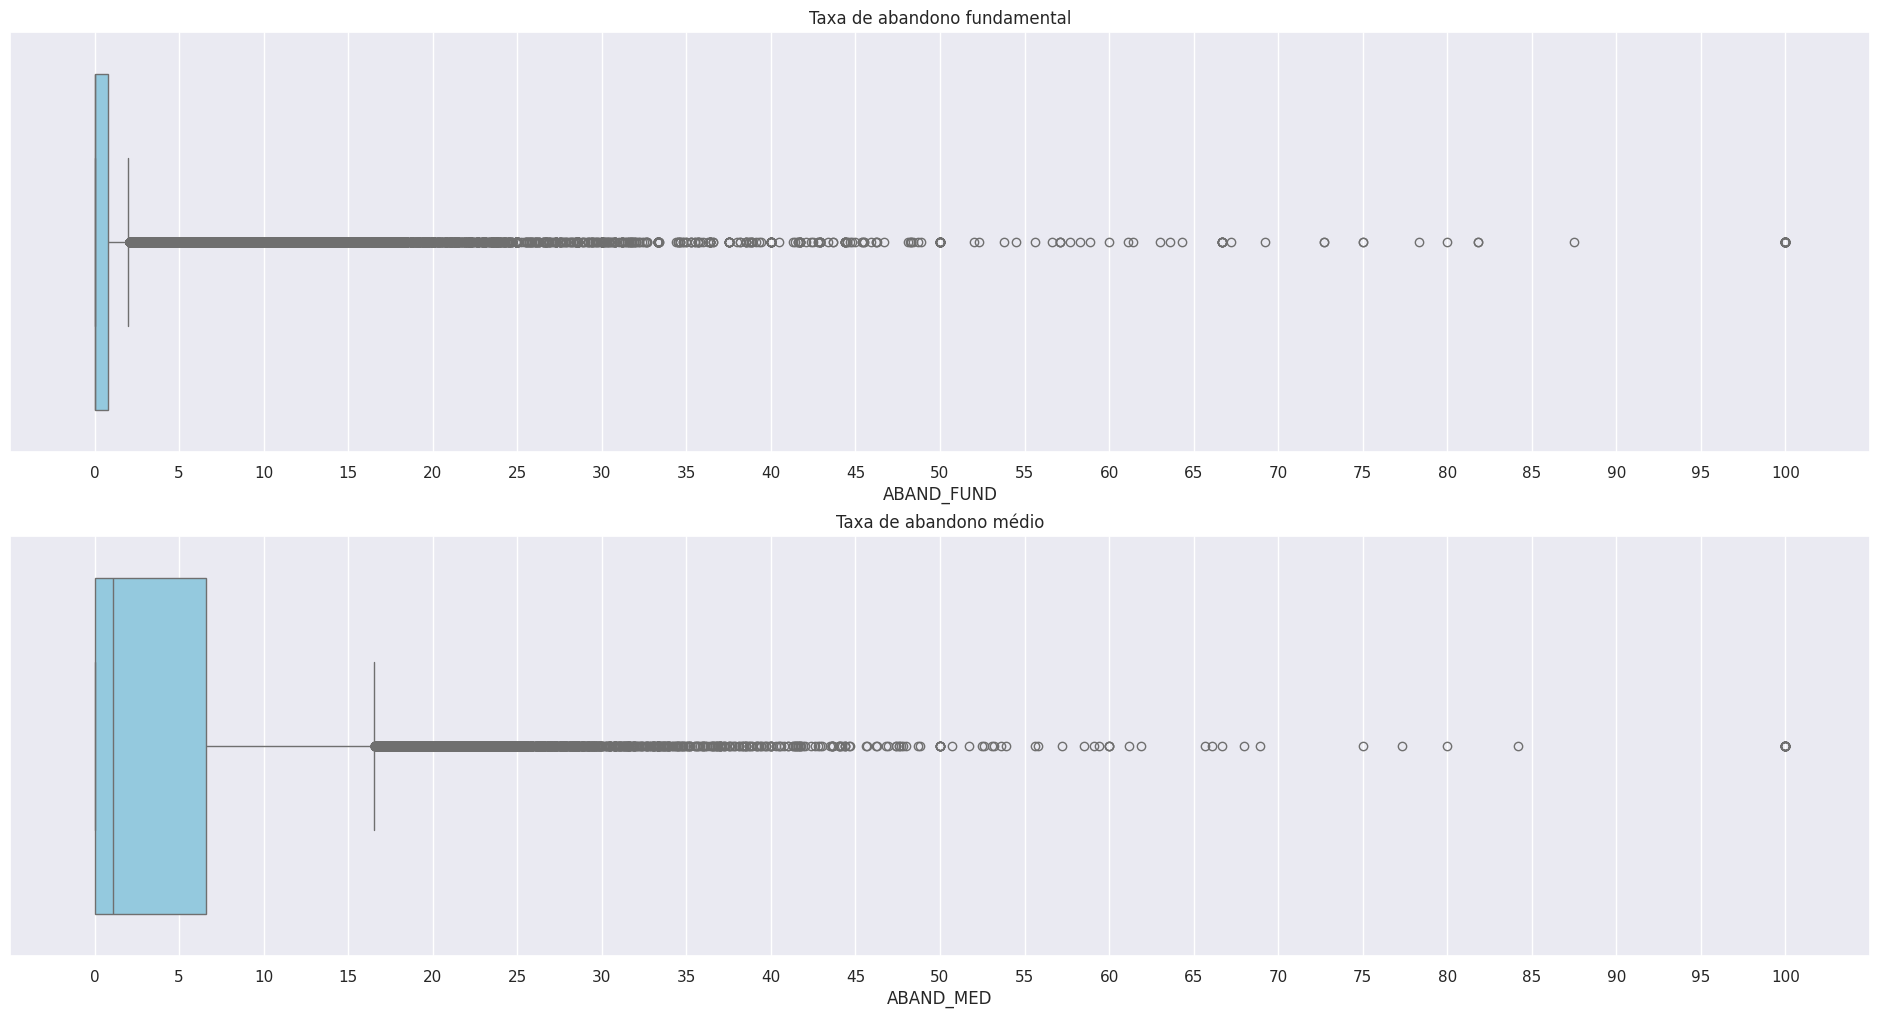

In [23]:
sns.set_theme()
plt.figure(figsize=(24,12))
plt.subplot(2,1,1)
sns.boxplot(data=df_microdados_fund, x='ABAND_FUND', color='skyblue')
plt.title("Taxa de abandono fundamental")
plt.xticks(range(0,101,5))

plt.subplot(2,1,2)
sns.boxplot(data=df_microdados_med, x='ABAND_MED', color='skyblue')
plt.title("Taxa de abandono médio")
plt.xticks(range(0,101,5))

plt.show()


In [24]:
# Lista para armazenar as colunas relevantes
relevant_columns_fund = []
irelevant_columns_fund = []
#Itera sobre as colunas do dataframe para criar uma tabela de contigência entre cada coluna e a variável alvo
for column in df_microdados_fund.columns:
    contigency_table = pd.crosstab(df_microdados_fund[column],df_microdados_fund['ABAND_FUND'])
    _, p, _, _ = chi2_contingency(contigency_table)
    
    if p < 0.05:
        relevant_columns_fund.append(column)
    else:
        irelevant_columns_fund.append(column)
    
print(relevant_columns_fund)
print(irelevant_columns_fund)
    

['IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO', 'IN_SALA_MULTIUSO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', 'IN_ESPACO_ATIVIDADE', 'ABAND_FUND']
['CO_ENTIDADE', 'IN_LABORATORIO_EDUC_PROF', 'IN_SALA_REPOUSO_ALUNO', 'QT_SALAS_UTILIZADAS', 'QT_SALAS_UTILIZA_CLIMATIZADAS', 'IN_INTERNET_COMUNIDADE']


In [25]:
# Lista para armazenar as colunas relevantes
relevant_columns_med = []
#Itera sobre as colunas do dataframe para criar uma tabela de contigência entre cada coluna e a variável alvo
for column in df_microdados_med.columns:
    contigency_table = pd.crosstab(df_microdados_med[column],df_microdados_med['ABAND_MED'])
    _, p, _, _ = chi2_contingency(contigency_table)
    
    if p < 0.05:
        relevant_columns_med.append(column)
    
print(relevant_columns_med)

['IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO', 'IN_SALA_MULTIUSO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'QT_SALAS_UTILIZADAS', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', 'IN_ESPACO_ATIVIDADE', 'ABAND_MED']


In [26]:
common_coluns = [i for i in relevant_columns_fund if i in relevant_columns_med]

print (f'Colunas em comum: {common_coluns}')

Colunas em comum: ['IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO', 'IN_SALA_MULTIUSO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', 'IN_ESPACO_ATIVIDADE']


In [27]:
#Reorganizando os DFs com apenas as colunas relevantes
relevant_columns_fund = ['CO_ENTIDADE'] + common_coluns + ['ABAND_FUND']
relevant_columns_med = ['CO_ENTIDADE'] + common_coluns + ['ABAND_MED']
print(f'Relevant coluns for fund: {relevant_columns_fund} \n Relevant coluns for med: {relevant_columns_med}')
#df_microdados_fund = df_microdados_fund[relevant_columns_fund]
#df_microdados_med = df_microdados_med[relevant_columns_med]

len(df_microdados_med.columns)
#len(df_microdados_fund.columns)

Relevant coluns for fund: ['CO_ENTIDADE', 'IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO', 'IN_SALA_MULTIUSO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', 'IN_ESPACO_ATIVIDADE', 'ABAND_FUND'] 
 Relevant coluns for med: ['CO_ENTIDADE', 'IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO', 'IN_SALA_MULTIUSO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM', 'I

29

In [28]:
df_microdados_fund = df_microdados_fund[relevant_columns_fund]
df_microdados_med = df_microdados_med[relevant_columns_med]

In [29]:
#Visualizando os valores únicos
unique_target_fund = sorted(df_microdados_fund['ABAND_FUND'].unique())
unique_target_med = sorted(df_microdados_med['ABAND_MED'].unique())

print(f'Distinct fund: {unique_target_fund} \n Distinct med: {unique_target_med}')

Distinct fund: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0

In [30]:
#Encontrando os percentis com valores significativos
final = {}
for i in np.arange(0,1,0.01) :
    
    if df_microdados_fund['ABAND_FUND'].quantile(i) > 0:
        final[i] = df_microdados_fund['ABAND_FUND'].quantile(i)
print(final)

print(len(final.keys()))



{0.66: 0.1, 0.67: 0.2, 0.68: 0.3, 0.6900000000000001: 0.3, 0.7000000000000001: 0.4, 0.71: 0.5, 0.72: 0.5, 0.73: 0.6, 0.74: 0.7, 0.75: 0.8, 0.76: 0.9, 0.77: 1.0, 0.78: 1.1, 0.79: 1.2, 0.8: 1.4, 0.81: 1.5, 0.8200000000000001: 1.7, 0.8300000000000001: 1.8, 0.84: 2.0, 0.85: 2.2, 0.86: 2.5, 0.87: 2.7, 0.88: 3.0, 0.89: 3.4, 0.9: 3.7, 0.91: 4.1, 0.92: 4.6, 0.93: 5.2, 0.9400000000000001: 5.9, 0.9500000000000001: 6.7, 0.96: 7.9, 0.97: 9.5, 0.98: 12.1, 0.99: 16.7}
34


In [31]:
#Encontrando os percentis com valores significativos
final = {}
for i in np.arange(0,1,0.01) :
    
    if df_microdados_med['ABAND_MED'].quantile(i) > 0:
        final[i] = df_microdados_med['ABAND_MED'].quantile(i)
print(final)
print(len(final.keys()))




{0.43: 0.2, 0.44: 0.3, 0.45: 0.4, 0.46: 0.6, 0.47000000000000003: 0.7, 0.48: 0.8, 0.49: 0.9, 0.5: 1.1, 0.51: 1.2, 0.52: 1.3, 0.53: 1.5, 0.54: 1.6, 0.55: 1.8, 0.56: 2.0, 0.5700000000000001: 2.1, 0.58: 2.3, 0.59: 2.5, 0.6: 2.7, 0.61: 2.9, 0.62: 3.2, 0.63: 3.4, 0.64: 3.6, 0.65: 3.8, 0.66: 4.1, 0.67: 4.3, 0.68: 4.6, 0.6900000000000001: 4.8, 0.7000000000000001: 5.1, 0.71: 5.4, 0.72: 5.6, 0.73: 6.0, 0.74: 6.3, 0.75: 6.6, 0.76: 6.9, 0.77: 7.3, 0.78: 7.7, 0.79: 8.0, 0.8: 8.4, 0.81: 8.7, 0.8200000000000001: 9.2, 0.8300000000000001: 9.6, 0.84: 10.1, 0.85: 10.6, 0.86: 11.2, 0.87: 11.8, 0.88: 12.4, 0.89: 13.0, 0.9: 13.7, 0.91: 14.5, 0.92: 15.4, 0.93: 16.4, 0.9400000000000001: 17.5, 0.9500000000000001: 18.9, 0.96: 20.6, 0.97: 22.9, 0.98: 25.8, 0.99: 31.3}
57


In [32]:
#Definição dos limites conforme encontrado na análise
limites_bins_fund = [-0.1, 0.1, 0.7, 1.8, 4.1, 100]
limites_bins_med = [-0.1, 0.2, 2.1, 5.4, 10.6, 100]

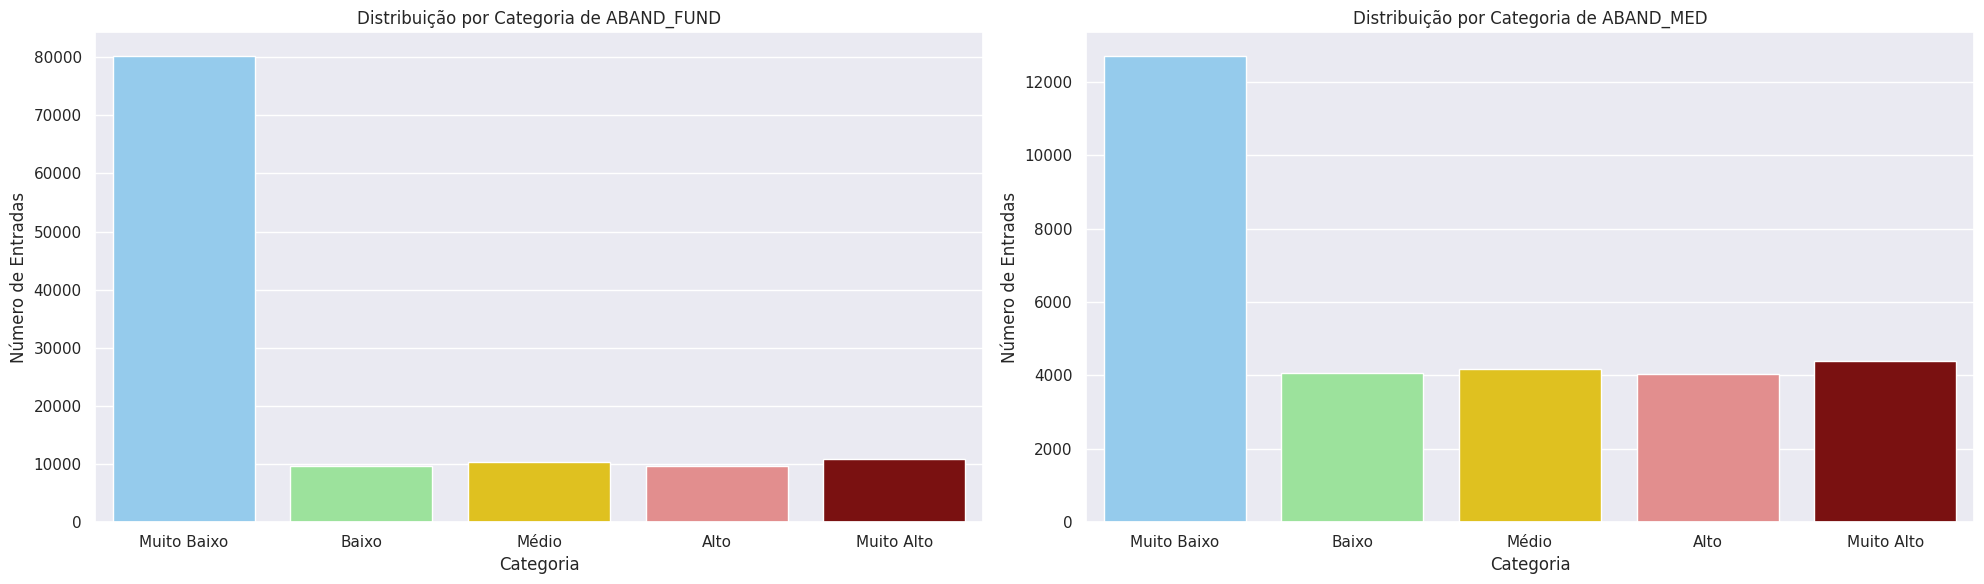

In [33]:
#Construção dos gráficos para visualizar a distribuição dentro dos dataframes
ordinal_classes = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']

def gerar_grafico_aband_fund():
    
    categorias = pd.cut(df_microdados_fund["ABAND_FUND"], limites_bins_fund, labels=ordinal_classes)
    cores = ['lightskyblue', 'lightgreen', 'gold','lightcoral', 'darkred']
    cmap = colors.LinearSegmentedColormap.from_list("", cores)

    df_microdados_fund_agrupado = df_microdados_fund.groupby(categorias).size().reset_index().rename(columns={0: 'CONTAGEM'})
    sns.barplot(x='ABAND_FUND', y='CONTAGEM', data=df_microdados_fund_agrupado, hue='ABAND_FUND', palette=cores)

    plt.xlabel('Categoria')
    plt.ylabel('Número de Entradas')
    plt.title('Distribuição por Categoria de ABAND_FUND')

def gerar_grafico_aband_med():
    
    categorias = pd.cut(df_microdados_med["ABAND_MED"], limites_bins_med, labels=ordinal_classes)
    cores = ['lightskyblue', 'lightgreen', 'gold','lightcoral', 'darkred']
    cmap = colors.LinearSegmentedColormap.from_list("", cores)

    df_microdados_fund_agrupado = df_microdados_fund.groupby(categorias).size().reset_index().rename(columns={0: 'CONTAGEM'})
    sns.barplot(x='ABAND_MED', y='CONTAGEM', data=df_microdados_fund_agrupado, hue='ABAND_MED', palette=cores)

    plt.xlabel('Categoria')
    plt.ylabel('Número de Entradas')
    plt.title('Distribuição por Categoria de ABAND_MED')


# Gerar os gráficos em figuras separadas
plt.figure(figsize=(20, 6))  # Definir tamanho da figura (opcional)

# Gerar e posicionar o primeiro gráfico
subplot1 = plt.subplot(1, 2, 1)  # Criar subplot na posição 1, 2 (linha 1, coluna 1)
gerar_grafico_aband_fund()


# Gerar e posicionar o segundo gráfico
subplot2 = plt.subplot(1, 2, 2)  # Criar subplot na posição 1, 2 (linha 1, coluna 2)
gerar_grafico_aband_med()

plt.tight_layout()

# Apresentar os gráficos na tela
plt.show()

In [34]:
df_microdados_fund['CLASSE_ABAND'] = pd.cut(df_microdados_fund['ABAND_FUND'], bins=limites_bins_fund, labels=ordinal_classes)
df_microdados_med['CLASSE_ABAND'] = pd.cut(df_microdados_med['ABAND_MED'], bins=limites_bins_med, labels=ordinal_classes)

# Regressão Logística


In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, loguniform

X = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])
y = df_microdados_fund['CLASSE_ABAND']

# Cria um objeto SMOTE
smote = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled, y_resampled = smote.fit_resample(X, y)

# Encode labels
label_encoder = LabelEncoder()
y_resampled = pd.Series(label_encoder.fit_transform(y_resampled))

# Parâmetros para o RandomizedSearch
param_distributions = {
    'logistic__C': loguniform(1e-4, 1e4),
    'logistic__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logistic__solver': ['saga'],  # saga supports l1, l2, and elasticnet
    'logistic__l1_ratio': uniform(0, 1)  # Only used if penalty is elasticnet
}

# Criação do pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(multi_class="multinomial", max_iter=10000, class_weight='balanced'))
])

print(f'Using pipeline: {pipeline}')
# RandomizedSearchCV para LogisticRegression com pipeline
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=5, scoring='f1_weighted')
random_search.fit(X_resampled, y_resampled)

best_model = random_search.best_estimator_

print(f'Melhor modelo encontrado: {best_model}')
# Avaliação adicional usando cross_val_score com mais dobras (e.g., 10 dobras)
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Usar cross_val_score para calcular as métricas de desempenho
scores = cross_val_score(best_model, X_resampled, y_resampled, cv=skfold, scoring='f1_weighted')

# Cálculo das métricas
mean_f1 = np.mean(scores)
print("Média de F1-score:", mean_f1)

# Avaliação de outras métricas
results = cross_validate(best_model, X_resampled, y_resampled, cv=skfold, scoring=scoring)

mean_accuracy = np.mean(results['test_accuracy'])
mean_precision = np.mean(results['test_precision_weighted'])
mean_recall = np.mean(results['test_recall_weighted'])
mean_auc = np.mean(results['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy)
print("Média de Precision:", mean_precision)
print("Média de Recall:", mean_recall)
print("Média de AUC-ROC:", mean_auc)




Using pipeline: Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    multi_class='multinomial'))])


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172:

Melhor modelo encontrado: Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.00011390176182186631,
                                    class_weight='balanced',
                                    l1_ratio=0.023062425041415757,
                                    max_iter=10000, multi_class='multinomial',
                                    penalty='elasticnet', solver='saga'))])
Média de F1-score: 0.32571084009306384
Média de Accuracy: 0.34416947040498436
Média de Precision: 0.3403062297391086
Média de Recall: 0.34416947040498436
Média de AUC-ROC: 0.6731525764307411


In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])
y = df_microdados_fund['CLASSE_ABAND']

# Cria um objeto SMOTE
smote = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled, y_resampled = smote.fit_resample(X, y)

# Encode labels
label_encoder = LabelEncoder()
y_resampled = pd.Series(label_encoder.fit_transform(y_resampled))

# Parâmetros para o RandomizedSearch
param_distributions = {
    'C': np.logspace(-4, 4, 1000),  # Variação maior para C
    'penalty': ['elasticnet'],  # Apenas 'elasticnet' é usado
    'solver': ['saga'],  # Apenas 'saga' é usado
    'l1_ratio': np.linspace(0, 1, 1000)  # Variação maior para l1_ratio
}

# RandomizedSearchCV para LogisticRegression
random_search = RandomizedSearchCV(LogisticRegression(multi_class="multinomial", max_iter=100000, class_weight='balanced'), param_distributions, n_iter=50, cv=6, scoring='f1_weighted', random_state=42)
random_search.fit(X_resampled, y_resampled)

best_model = random_search.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Usar cross_validate para calcular as métricas de desempenho
results = cross_validate(best_model, X_resampled, y_resampled, cv=skfold, scoring=scoring)

# Cálculo das médias das métricas
mean_accuracy = np.mean(results['test_accuracy'])
mean_precision = np.mean(results['test_precision_weighted'])
mean_recall = np.mean(results['test_recall_weighted'])
mean_f1 = np.mean(results['test_f1_weighted'])
mean_auc = np.mean(results['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy)
print("Média de Precision:", mean_precision)
print("Média de Recall:", mean_recall)
print("Média de F1-score:", mean_f1)
print("Média de AUC-ROC:", mean_auc)

print(best_model)


Média de Accuracy: 0.3430778816199377
Média de Precision: 0.33715479211099825
Média de Recall: 0.3430778816199377
Média de F1-score: 0.3257084335471583
Média de AUC-ROC: 0.6729671859939248
LogisticRegression(C=0.007618717702322999, class_weight='balanced',
                   l1_ratio=0.7967967967967968, max_iter=100000,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')


In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])
y = df_microdados_med['CLASSE_ABAND']

# Cria um objeto SMOTE
smote = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled, y_resampled = smote.fit_resample(X, y)

# Encode labels
label_encoder = LabelEncoder()
y_resampled = pd.Series(label_encoder.fit_transform(y_resampled))

# Parâmetros para o RandomizedSearch
param_distributions = {
    'C': np.logspace(-4, 4, 1000),  # Variação maior para C
    'penalty': ['elasticnet'],  # Apenas 'elasticnet' é usado
    'solver': ['saga'],  # Apenas 'saga' é usado
    'l1_ratio': np.linspace(0, 1, 1000)  # Variação maior para l1_ratio
}

# RandomizedSearchCV para LogisticRegression
random_search = RandomizedSearchCV(LogisticRegression(multi_class="multinomial", max_iter=100000, class_weight='balanced'), param_distributions, n_iter=50, cv=6, scoring='f1_weighted', random_state=13)
random_search.fit(X_resampled, y_resampled)

best_model = random_search.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

# Usar cross_validate para calcular as métricas de desempenho
results = cross_validate(best_model, X_resampled, y_resampled, cv=skfold, scoring=scoring)

# Cálculo das médias das métricas
mean_accuracy = np.mean(results['test_accuracy'])
mean_precision = np.mean(results['test_precision_weighted'])
mean_recall = np.mean(results['test_recall_weighted'])
mean_f1 = np.mean(results['test_f1_weighted'])
mean_auc = np.mean(results['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy)
print("Média de Precision:", mean_precision)
print("Média de Recall:", mean_recall)
print("Média de F1-score:", mean_f1)
print("Média de AUC-ROC:", mean_auc)

print(best_model)


Média de Accuracy: 0.36020456333595596
Média de Precision: 0.36522404787452406
Média de Recall: 0.36020456333595596
Média de F1-score: 0.35874923563409916
Média de AUC-ROC: 0.6697657512716342
LogisticRegression(C=0.3593813663804626, class_weight='balanced',
                   l1_ratio=0.6456456456456456, max_iter=100000,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')


# Árvore de Decisão

In [46]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

X_dt = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])
y_dt = df_microdados_fund['CLASSE_ABAND']

# Cria um objeto SMOTE
smote_dt = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled_dt, y_resampled_dt = smote_dt.fit_resample(X_dt, y_dt)

# Encode labels
label_encoder_dt = LabelEncoder()
y_resampled_dt = pd.Series(label_encoder_dt.fit_transform(y_resampled_dt))

# Parâmetros para o RandomizedSearch
param_distributions_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(5, 100),  # Ampliando o intervalo para max_depth
    'min_samples_split': randint(2, 100),  # Ampliando o intervalo para min_samples_split
    'min_samples_leaf': randint(1, 50),  # Mantendo o intervalo para min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],  # Mantendo as opções para min_impurity_decrease
    'splitter': ['best', 'random'],  # Mantendo as opções para splitter
}

# RandomizedSearchCV para DecisionTreeClassifier
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions_dt, n_iter=100, cv=5, scoring='f1_weighted', random_state=13)
random_search_dt.fit(X_resampled_dt, y_resampled_dt)

best_model_dt = random_search_dt.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring_dt = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold_dt = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

# Usar cross_validate para calcular as métricas de desempenho
results_dt = cross_validate(best_model_dt, X_resampled_dt, y_resampled_dt, cv=skfold_dt, scoring=scoring_dt)

# Cálculo das médias das métricas
mean_accuracy_dt = np.mean(results_dt['test_accuracy'])
mean_precision_dt = np.mean(results_dt['test_precision_weighted'])
mean_recall_dt = np.mean(results_dt['test_recall_weighted'])
mean_f1_dt = np.mean(results_dt['test_f1_weighted'])
mean_auc_dt = np.mean(results_dt['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy_dt)
print("Média de Precision:", mean_precision_dt)
print("Média de Recall:", mean_recall_dt)
print("Média de F1-score:", mean_f1_dt)
print("Média de AUC-ROC:", mean_auc_dt)

print(best_model_dt)


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
105 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/base

Média de Accuracy: 0.4323165109034267
Média de Precision: 0.4476558427260506
Média de Recall: 0.4323165109034267
Média de F1-score: 0.43066381999999565
Média de AUC-ROC: 0.7618485376500617
DecisionTreeClassifier(class_weight='balanced', max_depth=46,
                       min_samples_leaf=19, min_samples_split=70)


In [44]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

X_dt = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])
y_dt = df_microdados_med['CLASSE_ABAND']

# Cria um objeto SMOTE
smote_dt = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled_dt, y_resampled_dt = smote_dt.fit_resample(X_dt, y_dt)

# Encode labels
label_encoder_dt = LabelEncoder()
y_resampled_dt = pd.Series(label_encoder_dt.fit_transform(y_resampled_dt))

# Parâmetros para o RandomizedSearch
param_distributions_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(5, 100),  # Ampliando o intervalo para max_depth
    'min_samples_split': randint(2, 100),  # Ampliando o intervalo para min_samples_split
    'min_samples_leaf': randint(1, 50),  # Mantendo o intervalo para min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],  # Mantendo as opções para min_impurity_decrease
    'splitter': ['best', 'random'],  # Mantendo as opções para splitter
}

# RandomizedSearchCV para DecisionTreeClassifier
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions_dt, n_iter=100, cv=5, scoring='f1_weighted', random_state=13)
random_search_dt.fit(X_resampled_dt, y_resampled_dt)

best_model_dt = random_search_dt.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring_dt = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold_dt = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

# Usar cross_validate para calcular as métricas de desempenho
results_dt = cross_validate(best_model_dt, X_resampled_dt, y_resampled_dt, cv=skfold_dt, scoring=scoring_dt)

# Cálculo das médias das métricas
mean_accuracy_dt = np.mean(results_dt['test_accuracy'])
mean_precision_dt = np.mean(results_dt['test_precision_weighted'])
mean_recall_dt = np.mean(results_dt['test_recall_weighted'])
mean_f1_dt = np.mean(results_dt['test_f1_weighted'])
mean_auc_dt = np.mean(results_dt['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy_dt)
print("Média de Precision:", mean_precision_dt)
print("Média de Recall:", mean_recall_dt)
print("Média de F1-score:", mean_f1_dt)
print("Média de AUC-ROC:", mean_auc_dt)

print(best_model_dt)


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
105 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/base

Média de Accuracy: 0.42100708103855233
Média de Precision: 0.43932515314192744
Média de Recall: 0.42100708103855233
Média de F1-score: 0.4270118860405928
Média de AUC-ROC: 0.740666431024098
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=88, min_samples_leaf=9, min_samples_split=20,
                       splitter='random')


In [47]:
best_model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 46,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 19,
 'min_samples_split': 70,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Random Forest

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint, uniform

# Preparação dos dados
X_rf = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])
y_rf = df_microdados_fund['CLASSE_ABAND']

# Cria um objeto SMOTE
smote_rf = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled_rf, y_resampled_rf = smote_rf.fit_resample(X_rf, y_rf)

# Encode labels
label_encoder_rf = LabelEncoder()
y_resampled_rf = pd.Series(label_encoder_rf.fit_transform(y_resampled_rf))

# Parâmetros para o RandomizedSearch
param_distributions_rf = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# RandomizedSearchCV para RandomForestClassifier
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions_rf, n_iter=20, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=3)
random_search_rf.fit(X_resampled_rf, y_resampled_rf)

best_model_rf = random_search_rf.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring_rf = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold_rf = StratifiedKFold(n_splits=10, shuffle=True)

# Usar cross_validate para calcular as métricas de desempenho
results_rf = cross_validate(best_model_rf, X_resampled_rf, y_resampled_rf, cv=skfold_rf, scoring=scoring_rf)

# Cálculo das médias das métricas
mean_accuracy_rf = np.mean(results_rf['test_accuracy'])
mean_precision_rf = np.mean(results_rf['test_precision_weighted'])
mean_recall_rf = np.mean(results_rf['test_recall_weighted'])
mean_f1_rf = np.mean(results_rf['test_f1_weighted'])
mean_auc_rf = np.mean(results_rf['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy_rf)
print("Média de Precision:", mean_precision_rf)
print("Média de Recall:", mean_recall_rf)
print("Média de F1-score:", mean_f1_rf)
print("Média de AUC-ROC:", mean_auc_rf)

print(best_model_rf)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 3/3] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=405;, score=0.403 total time= 2.2min
[CV 2/3] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=405;, score=0.432 total time= 2.2min
[CV 1/3] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=405;, score=0.355 total time= 2.3min
[CV 3/3] END bootstrap=True, class_weight=balanced, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=16, n_estimators=218;, score=0.380 total time= 3.0min
[CV 2/3] END bootstrap=True, class_weight=balanced, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=16, n_estimators=218;, score=0.396 total time= 3.1min
[CV 1/3] END bootstrap=True

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3] END bootstrap=True, class_weight=balanced_subsample, max_depth=24, max_features=sqrt, min_samples_leaf=18, min_samples_split=6, n_estimators=897;, score=0.359 total time= 5.3min
[CV 3/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=17, n_estimators=977;, score=0.434 total time= 6.8min
[CV 2/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=17, n_estimators=977;, score=0.460 total time= 7.0min
[CV 1/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=17, n_estimators=977;, score=0.381 total time= 7.5min
[CV 2/3] END bootstrap=True, class_weight=None, max_depth=41, max_features=None, min_samples_leaf=15, min_samples_split=3, n_estimators=260;, score=0.444 total time= 4.1min
[CV 3/3] END bootstrap=True, class_weight=None, max_depth=41, max_features=N

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint, uniform

# Preparação dos dados
X_rf = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])
y_rf = df_microdados_med['CLASSE_ABAND']

# Cria um objeto SMOTE
smote_rf = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled_rf, y_resampled_rf = smote_rf.fit_resample(X_rf, y_rf)

# Encode labels
label_encoder_rf = LabelEncoder()
y_resampled_rf = pd.Series(label_encoder_rf.fit_transform(y_resampled_rf))

# Parâmetros para o RandomizedSearch
param_distributions_rf = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# RandomizedSearchCV para RandomForestClassifier
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions_rf, n_iter=20, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=3)
random_search_rf.fit(X_resampled_rf, y_resampled_rf)

best_model_rf = random_search_rf.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring_rf = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold_rf = StratifiedKFold(n_splits=10, shuffle=True)

# Usar cross_validate para calcular as métricas de desempenho
results_rf = cross_validate(best_model_rf, X_resampled_rf, y_resampled_rf, cv=skfold_rf, scoring=scoring_rf)

# Cálculo das médias das métricas
mean_accuracy_rf = np.mean(results_rf['test_accuracy'])
mean_precision_rf = np.mean(results_rf['test_precision_weighted'])
mean_recall_rf = np.mean(results_rf['test_recall_weighted'])
mean_f1_rf = np.mean(results_rf['test_f1_weighted'])
mean_auc_rf = np.mean(results_rf['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy_rf)
print("Média de Precision:", mean_precision_rf)
print("Média de Recall:", mean_recall_rf)
print("Média de F1-score:", mean_f1_rf)
print("Média de AUC-ROC:", mean_auc_rf)

print(best_model_rf)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 3/3] END bootstrap=False, class_weight=None, max_depth=49, max_features=None, min_samples_leaf=11, min_samples_split=19, n_estimators=203;, score=0.443 total time=  18.0s
[CV 2/3] END bootstrap=False, class_weight=None, max_depth=49, max_features=None, min_samples_leaf=11, min_samples_split=19, n_estimators=203;, score=0.456 total time=  18.8s
[CV 1/3] END bootstrap=False, class_weight=None, max_depth=49, max_features=None, min_samples_leaf=11, min_samples_split=19, n_estimators=203;, score=0.394 total time=  21.9s
[CV 2/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=921;, score=0.486 total time=  28.8s


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=49, max_features=None, min_samples_leaf=5, min_samples_split=18, n_estimators=480;, score=0.467 total time=  50.2s
[CV 1/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=921;, score=0.405 total time=  32.4s
[CV 3/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=921;, score=0.475 total time=  28.7s
[CV 3/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=49, max_features=None, min_samples_leaf=5, min_samples_split=18, n_estimators=480;, score=0.455 total time=  53.7s
[CV 2/3] END bootstrap=True, class_weight=balanced, max_depth=28, max_features=None, min_samples_leaf=18, min_samples_split=7, n_estimators=126;, score=0.453 total time=   7.3s
[CV 1/3] END bootstrap=True, class_weight=balanced, max_depth=28, max_f

# K-means

### Método do cotovelo


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 3784547.907984592.
Iteration 1, inertia 2331271.829455965.
Iteration 2, inertia 2267534.0935484553.
Iteration 3, inertia 2247077.3765001767.
Iteration 4, inertia 2240271.3902544733.
Iteration 5, inertia 2237241.830254651.
Iteration 6, inertia 2236409.5990171223.
Iteration 7, inertia 2236196.8549472843.
Iteration 8, inertia 2236114.6495713866.
Iteration 9, inertia 2236091.3376670727.
Converged at iteration 9: center shift 6.11322434611146e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 3385417.905855208.
Iteration 1, inertia 2296095.786490183.
Iteration 2, inertia 2240927.4790172065.
Iteration 3, inertia 2237186.1413752167.
Iteration 4, inertia 2236420.6464568726.
Iteration 5, inertia 2236209.4309262214.
Iteration 6, inertia 2236116.0695561273.
Iteration 7, inertia 2236091.3376670727.
Converged at iteration 7: center shift 6.113224346111306e-05 within tolerance 9.999999999999404e-05.
Initialization com

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2922352.9365604487.
Iteration 1, inertia 2131763.7145929695.
Iteration 2, inertia 2110437.7221737746.
Iteration 3, inertia 2104561.932992557.
Iteration 4, inertia 2101046.258775963.
Iteration 5, inertia 2098912.5342598.
Iteration 6, inertia 2095409.6995664071.
Iteration 7, inertia 2091013.2839322395.
Iteration 8, inertia 2089462.947966188.
Iteration 9, inertia 2087652.5256137764.
Iteration 10, inertia 2086070.8242437234.
Iteration 11, inertia 2085026.1445322596.
Iteration 12, inertia 2084465.8966448326.
Iteration 13, inertia 2084212.4368791296.
Iteration 14, inertia 2084155.8768229913.
Iteration 15, inertia 2084148.5843283378.
Converged at iteration 15: center shift 5.766219374981748e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 3274394.20536944.
Iteration 1, inertia 2196610.3172813137.
Iteration 2, inertia 2142629.0114947422.
Iteration 3, inertia 2114943.448307349.
Iteration 4, inertia 2099852.656414945.
Iteration 5, iner

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 2084338.8665430415.
Iteration 2, inertia 2040968.377431671.
Iteration 3, inertia 2020158.3097707382.
Iteration 4, inertia 1998674.8175252322.
Iteration 5, inertia 1978511.8713091423.
Iteration 6, inertia 1961012.1275891715.
Iteration 7, inertia 1949471.9065346809.
Iteration 8, inertia 1944300.2153286347.
Iteration 9, inertia 1940608.768507348.
Iteration 10, inertia 1935396.4048176748.
Iteration 11, inertia 1929476.733355744.
Iteration 12, inertia 1926454.482261811.
Iteration 13, inertia 1925747.4724384411.
Iteration 14, inertia 1925414.015885223.
Iteration 15, inertia 1925313.1899297622.
Iteration 16, inertia 1925242.92786853.
Iteration 17, inertia 1925219.1849892973.
Iteration 18, inertia 1925206.5858436679.
Converged at iteration 18: center shift 6.932655399212387e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2939694.3630105834.
Iteration 1, inertia 2096373.6718341196.
Iteration 2, inertia 2049212.483134809.
Iteration 3,

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 5, inertia 1816051.7993236075.
Iteration 6, inertia 1816027.5686550876.
Converged at iteration 6: center shift 8.379196492163103e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2615673.6361633507.
Iteration 1, inertia 1842999.5269210087.
Iteration 2, inertia 1810036.7392953057.
Iteration 3, inertia 1805821.7993775199.
Iteration 4, inertia 1805230.6964675535.
Iteration 5, inertia 1805164.924025185.
Iteration 6, inertia 1805150.3668643753.
Converged at iteration 6: center shift 9.210162697892485e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2729160.9186464185.
Iteration 1, inertia 1957488.9991464447.
Iteration 2, inertia 1897363.199154576.
Iteration 3, inertia 1889260.9743493092.
Iteration 4, inertia 1882020.7707028342.
Iteration 5, inertia 1871952.640356089.
Iteration 6, inertia 1861765.439422985.
Iteration 7, inertia 1851956.882297344.
Iteration 8, inertia 1837324.8163691214.
Iteration 9, iner

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 2542714.9662949033.
Iteration 1, inertia 1902975.9764404085.
Iteration 2, inertia 1851272.8032954517.
Iteration 3, inertia 1813750.2469387823.
Iteration 4, inertia 1782098.4119718971.
Iteration 5, inertia 1767243.2499038544.
Iteration 6, inertia 1754368.7677442778.
Iteration 7, inertia 1740614.2415047807.
Iteration 8, inertia 1731902.9998590997.
Iteration 9, inertia 1727503.9154488486.
Iteration 10, inertia 1725589.3592173937.
Iteration 11, inertia 1721465.5958232586.
Iteration 12, inertia 1717341.1972981892.
Iteration 13, inertia 1714391.459884199.
Iteration 14, inertia 1711109.3000885863.
Iteration 15, inertia 1705928.8441070826.
Iteration 16, inertia 1704629.7285639248.
Iteration 17, inertia 1704250.983414154.
Iteration 18, inertia 1704202.7789507366.
Iteration 19, inertia 1704063.499683704.
Iteration 20, inertia 1703991.2034046731.
Iteration 21, inertia 1703919.6593009862.
Iteration 22, inertia 1703903.3800885768.
Iteration 23, inertia 1

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 2, inertia 1698974.3964576658.
Iteration 3, inertia 1688281.1605728045.
Iteration 4, inertia 1686100.2682488356.
Iteration 5, inertia 1683892.860734543.
Iteration 6, inertia 1683293.9778902733.
Iteration 7, inertia 1682878.011475889.
Iteration 8, inertia 1682672.2718179536.
Iteration 9, inertia 1682655.9823974292.
Iteration 10, inertia 1682650.8318981722.
Converged at iteration 10: center shift 4.8484869452134704e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2595809.389480153.
Iteration 1, inertia 1795233.6287185198.
Iteration 2, inertia 1728681.2634228661.
Iteration 3, inertia 1717497.702677885.
Iteration 4, inertia 1714427.112706205.
Iteration 5, inertia 1710318.783298861.
Iteration 6, inertia 1707889.974628383.
Iteration 7, inertia 1706839.5987359842.
Iteration 8, inertia 1706555.2500772849.
Iteration 9, inertia 1706336.7822356329.
Iteration 10, inertia 1706066.1449661825.
Iteration 11, inertia 1705718.7320678611.
Iteration 12, in

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 1694542.82307779.
Iteration 2, inertia 1653616.9334781454.
Iteration 3, inertia 1627414.390456266.
Iteration 4, inertia 1620033.3643322638.
Iteration 5, inertia 1616128.0678153713.
Iteration 6, inertia 1602357.9844299667.
Iteration 7, inertia 1585450.1670021345.
Iteration 8, inertia 1584685.4596551722.
Iteration 9, inertia 1584543.9900784465.
Iteration 10, inertia 1583401.8742754336.
Iteration 11, inertia 1582370.9990286345.
Iteration 12, inertia 1579676.348344433.
Iteration 13, inertia 1578590.3438275703.
Iteration 14, inertia 1578317.067571296.
Iteration 15, inertia 1578221.1096319759.
Iteration 16, inertia 1578175.236736589.
Iteration 17, inertia 1578171.9701468933.
Converged at iteration 17: center shift 6.692589057927326e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2321177.3673927393.
Iteration 1, inertia 1736160.5357197677.
Iteration 2, inertia 1681549.8287419672.
Iteration 3, inertia 1666148.841087966.
Iteration 4,

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 2323640.9909466165.
Iteration 1, inertia 1606731.113553287.
Iteration 2, inertia 1539312.2904447056.
Iteration 3, inertia 1516275.2461397024.
Iteration 4, inertia 1503393.753959983.
Iteration 5, inertia 1500836.0585635854.
Iteration 6, inertia 1498610.5383522923.
Iteration 7, inertia 1497929.9561849588.
Iteration 8, inertia 1497820.900664724.
Iteration 9, inertia 1497757.163204272.
Iteration 10, inertia 1497717.053490686.
Iteration 11, inertia 1497655.9471970773.
Iteration 12, inertia 1497604.8583319802.
Iteration 13, inertia 1497537.5156998138.
Iteration 14, inertia 1497502.3444396965.
Iteration 15, inertia 1497474.1968976336.
Iteration 16, inertia 1497442.9366512953.
Iteration 17, inertia 1497379.3776470765.
Iteration 18, inertia 1497285.4998472948.
Iteration 19, inertia 1497151.6574549968.
Iteration 20, inertia 1496965.1670688142.
Iteration 21, inertia 1496680.3967383453.
Iteration 22, inertia 1496142.8972262586.
Iteration 23, inertia 149

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 2183098.708870116.
Iteration 1, inertia 1552326.6677420433.
Iteration 2, inertia 1505849.992063175.
Iteration 3, inertia 1486983.5320769253.
Iteration 4, inertia 1474852.1569323097.
Iteration 5, inertia 1468295.4521265728.
Iteration 6, inertia 1464891.7202801607.
Iteration 7, inertia 1458111.647147159.
Iteration 8, inertia 1456702.9150044732.
Iteration 9, inertia 1456525.538682549.
Iteration 10, inertia 1456511.8479241189.
Iteration 11, inertia 1456503.7830757955.
Iteration 12, inertia 1456498.3630424226.
Converged at iteration 12: center shift 1.1561946554260644e-06 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2229714.0401849006.
Iteration 1, inertia 1669511.2529544285.
Iteration 2, inertia 1619485.6462775045.
Iteration 3, inertia 1566324.3506589427.
Iteration 4, inertia 1500255.3469883364.
Iteration 5, inertia 1470329.7950637178.
Iteration 6, inertia 1466316.1581219733.
Iteration 7, inertia 1464938.8

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2099404.2640852705.
Iteration 1, inertia 1601083.4888831628.
Iteration 2, inertia 1570358.624449354.
Iteration 3, inertia 1565511.9775738912.
Iteration 4, inertia 1563231.3413562921.
Iteration 5, inertia 1560128.4928821488.
Iteration 6, inertia 1557607.9886918764.
Iteration 7, inertia 1556061.2869561315.
Iteration 8, inertia 1554703.1877603047.
Iteration 9, inertia 1552045.5387889273.
Iteration 10, inertia 1545078.297893723.
Iteration 11, inertia 1535354.653599533.
Iteration 12, inertia 1525197.1662858154.
Iteration 13, inertia 1516485.4236612087.
Iteration 14, inertia 1508641.7474497727.
Iteration 15, inertia 1501850.5623547798.
Iteration 16, inertia 1497505.4887386062.
Iteration 17, inertia 1496063.00367195.
Iteration 18, inertia 1495408.1232685877.
Iteration 19, inertia 1494954.3831828823.
Iteration 20, inertia 1494145.987771318.
Iteration 21, inertia 1492192.4251200818.
Iteration 22, inertia 1489132.4043878112.
Iteration 23, inertia 1484150.1700203067.
Iteratio

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 2116027.8065296886.
Iteration 1, inertia 1497373.3518670285.
Iteration 2, inertia 1421392.2862942563.
Iteration 3, inertia 1378779.2515174479.
Iteration 4, inertia 1348738.5406375262.
Iteration 5, inertia 1344132.999604752.
Iteration 6, inertia 1344033.256245227.
Iteration 7, inertia 1344018.679093692.
Iteration 8, inertia 1344013.6549221138.
Converged at iteration 8: center shift 4.7692312105320216e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1962529.878399287.
Iteration 1, inertia 1484252.5886024036.
Iteration 2, inertia 1439893.7297045265.
Iteration 3, inertia 1429573.7726353665.
Iteration 4, inertia 1426804.298275778.
Iteration 5, inertia 1424038.8265701933.
Iteration 6, inertia 1422553.5395202695.
Iteration 7, inertia 1421700.9966161528.
Iteration 8, inertia 1420723.9781980203.
Iteration 9, inertia 1419355.2152173298.
Iteration 10, inertia 1416055.1604126445.
Iteration 11, inertia 1412238.4097

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 2040088.0221243.
Iteration 1, inertia 1420805.1326169872.
Iteration 2, inertia 1376152.0061677785.
Iteration 3, inertia 1363236.2375124043.
Iteration 4, inertia 1357690.2179557865.
Iteration 5, inertia 1354355.9954172038.
Iteration 6, inertia 1351356.2085440261.
Iteration 7, inertia 1346890.1979115142.
Iteration 8, inertia 1340020.3927549487.
Iteration 9, inertia 1333824.378709296.
Iteration 10, inertia 1332267.8651931083.
Iteration 11, inertia 1330982.176315386.
Iteration 12, inertia 1328689.778639731.
Iteration 13, inertia 1326620.2326931802.
Iteration 14, inertia 1326096.1675902586.
Iteration 15, inertia 1325989.5501252804.
Iteration 16, inertia 1325966.9073173718.
Iteration 17, inertia 1325959.5689230526.
Converged at iteration 17: center shift 2.5868039869060815e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1977354.8066684597.
Iteration 1, inertia 1389378.0199600705.
Iteration 2, inertia 134431

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 2048393.6679100422.
Iteration 1, inertia 1418125.7028458987.
Iteration 2, inertia 1336998.8550652952.
Iteration 3, inertia 1324204.4051410563.
Iteration 4, inertia 1320336.8625001402.
Iteration 5, inertia 1320248.1281020828.
Iteration 6, inertia 1320228.155009682.
Iteration 7, inertia 1320206.2835327857.
Iteration 8, inertia 1320194.9960775892.
Iteration 9, inertia 1320186.1651389825.
Iteration 10, inertia 1320051.663992819.
Iteration 11, inertia 1319857.1474060258.
Iteration 12, inertia 1319738.0143047688.
Iteration 13, inertia 1319615.98319889.
Iteration 14, inertia 1319308.7512285288.
Iteration 15, inertia 1318738.6784152524.
Iteration 16, inertia 1317870.3828529904.
Iteration 17, inertia 1316672.1697557792.
Iteration 18, inertia 1311185.1060969746.
Iteration 19, inertia 1309467.5515952928.
Iteration 20, inertia 1307405.6390841207.
Iteration 21, inertia 1303597.5307561425.
Iteration 22, inertia 1303104.578877608.
Iteration 23, inertia 130

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 4, inertia 1282771.8627666808.
Iteration 5, inertia 1280739.4912111526.
Iteration 6, inertia 1280185.095061373.
Iteration 7, inertia 1279414.1714564203.
Iteration 8, inertia 1279197.2596847785.
Iteration 9, inertia 1279019.4518285524.
Iteration 10, inertia 1278908.3676870738.
Iteration 11, inertia 1278772.3880443384.
Iteration 12, inertia 1278626.5418512651.
Iteration 13, inertia 1278427.6427098094.
Iteration 14, inertia 1278252.5686835782.
Iteration 15, inertia 1278160.3166954585.
Iteration 16, inertia 1277844.2053784.
Iteration 17, inertia 1277681.80506183.
Iteration 18, inertia 1277623.112518255.
Iteration 19, inertia 1277611.2354031529.
Iteration 20, inertia 1277604.344488821.
Converged at iteration 20: center shift 8.965900718369116e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1868967.4111863591.
Iteration 1, inertia 1332307.2863092208.
Iteration 2, inertia 1256514.6152508042.
Iteration 3, inertia 1231510.1942763936.
Iteration 

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1766818.6412175489.
Iteration 1, inertia 1300475.4890389633.
Iteration 2, inertia 1273719.0210233289.
Iteration 3, inertia 1267961.6646990646.
Iteration 4, inertia 1264376.6748540984.
Iteration 5, inertia 1260288.4854203023.
Iteration 6, inertia 1255694.3380533264.
Iteration 7, inertia 1250975.269938095.
Iteration 8, inertia 1246419.6334572742.
Iteration 9, inertia 1242819.414843359.
Iteration 10, inertia 1236923.7460928848.
Iteration 11, inertia 1233309.2722586836.
Iteration 12, inertia 1232900.8075125227.
Iteration 13, inertia 1232867.118174882.
Iteration 14, inertia 1232863.3569712872.
Iteration 15, inertia 1232861.1311906897.
Iteration 16, inertia 1232859.3152508875.
Converged at iteration 16: center shift 9.06545160623532e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1814728.1497279329.
Iteration 1, inertia 1346201.920807017.
Iteration 2, inertia 1284866.645867156.
Iteration 3, inertia 1264305.

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1785925.2798214466.
Iteration 1, inertia 1254188.8687552582.
Iteration 2, inertia 1212575.287781371.
Iteration 3, inertia 1199878.08428371.
Iteration 4, inertia 1195135.6458303868.
Iteration 5, inertia 1191518.48589862.
Iteration 6, inertia 1190100.8696055147.
Iteration 7, inertia 1189867.1985482273.
Iteration 8, inertia 1189738.1975336408.
Iteration 9, inertia 1189609.4256996368.
Iteration 10, inertia 1189581.883864631.
Iteration 11, inertia 1189570.4850263707.
Iteration 12, inertia 1189518.6920758132.
Iteration 13, inertia 1189461.6187538488.
Iteration 14, inertia 1189361.245316993.
Iteration 15, inertia 1189298.9193621047.
Iteration 16, inertia 1189275.7516444614.
Iteration 17, inertia 1189248.3928515955.
Iteration 18, inertia 1189078.746042392.
Iteration 19, inertia 1188980.1818035145.
Iteration 20, inertia 1188905.5279808606.
Iteration 21, inertia 1188798.4576870475.
Iteration 22, inertia 1188412.6941855126.
Iteration 23, inertia 118831

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1688115.4851337569.
Iteration 1, inertia 1256902.3960101772.
Iteration 2, inertia 1214368.34468561.
Iteration 3, inertia 1194802.5019385323.
Iteration 4, inertia 1184251.3274670814.
Iteration 5, inertia 1181486.6551946884.
Iteration 6, inertia 1180610.3568825577.
Iteration 7, inertia 1180281.681827742.
Iteration 8, inertia 1179946.9730047316.
Iteration 9, inertia 1179708.8793535028.
Iteration 10, inertia 1179670.0048054028.
Iteration 11, inertia 1179583.557050819.
Iteration 12, inertia 1179527.4315237124.
Iteration 13, inertia 1179497.8460321208.
Iteration 14, inertia 1179487.310376623.
Converged at iteration 14: center shift 7.781236833888135e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1745833.6729357317.
Iteration 1, inertia 1221472.8588592154.
Iteration 2, inertia 1181730.1797164879.
Iteration 3, inertia 1168942.4004016449.
Iteration 4, inertia 1162180.106578054.
Iteration 5, inertia 1159343.02

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1710207.6052593044.
Iteration 1, inertia 1232474.3720421842.
Iteration 2, inertia 1187476.9168284598.
Iteration 3, inertia 1178962.1221712723.
Iteration 4, inertia 1173173.0656543626.
Iteration 5, inertia 1166111.7547550004.
Iteration 6, inertia 1163939.642768819.
Iteration 7, inertia 1162403.5274593998.
Iteration 8, inertia 1161617.7511788746.
Iteration 9, inertia 1161088.8419042334.
Iteration 10, inertia 1160629.852213331.
Iteration 11, inertia 1160338.912564424.
Iteration 12, inertia 1159869.4078190348.
Iteration 13, inertia 1158870.0911811132.
Iteration 14, inertia 1158031.5856866562.
Iteration 15, inertia 1157616.2614787032.
Iteration 16, inertia 1157118.8344239928.
Iteration 17, inertia 1156569.4550795648.
Iteration 18, inertia 1156492.168321289.
Iteration 19, inertia 1156467.918416171.
Iteration 20, inertia 1156459.9671461098.
Iteration 21, inertia 1156433.173762657.
Iteration 22, inertia 1156431.5413727704.
Iteration 23, inertia 1156

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 1715553.8332711193.
Iteration 1, inertia 1231551.1761082704.
Iteration 2, inertia 1163556.3119822512.
Iteration 3, inertia 1133647.5198294702.
Iteration 4, inertia 1125713.0221520278.
Iteration 5, inertia 1125087.199052963.
Iteration 6, inertia 1124978.7312722304.
Iteration 7, inertia 1124959.1423998084.
Iteration 8, inertia 1124951.4999392326.
Iteration 9, inertia 1124949.4100792638.
Iteration 10, inertia 1124948.2869650505.
Converged at iteration 10: center shift 7.078281356000201e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1661837.0439632828.
Iteration 1, inertia 1168444.3789766934.
Iteration 2, inertia 1118839.6655164408.
Iteration 3, inertia 1092358.169111786.
Iteration 4, inertia 1090283.6964406504.
Iteration 5, inertia 1089945.3631649434.
Iteration 6, inertia 1089717.3435019595.
Iteration 7, inertia 1089676.8350742664.
Iteration 8, inertia 1089670.027373567.
Converged at iteration 8: center shift 4.337074261320036

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1622980.1698490626.
Iteration 1, inertia 1195829.5893654944.
Iteration 2, inertia 1166256.6611140338.
Iteration 3, inertia 1158256.478543885.
Iteration 4, inertia 1154212.5839398126.
Iteration 5, inertia 1149463.198254179.
Iteration 6, inertia 1141399.9068299904.
Iteration 7, inertia 1135397.4386663833.
Iteration 8, inertia 1132966.6231173293.
Iteration 9, inertia 1131886.3492225017.
Iteration 10, inertia 1130483.7151050984.
Iteration 11, inertia 1129455.4610754815.
Iteration 12, inertia 1129113.3884960234.
Iteration 13, inertia 1129024.836372029.
Iteration 14, inertia 1128892.4057704906.
Iteration 15, inertia 1128747.4324216011.
Iteration 16, inertia 1128608.5610982855.
Iteration 17, inertia 1128516.6289445255.
Iteration 18, inertia 1128429.3391990701.
Iteration 19, inertia 1128289.8178117876.
Iteration 20, inertia 1128172.4220023276.
Iteration 21, inertia 1128132.3962560892.
Iteration 22, inertia 1128120.2244376552.
Iteration 23, inertia 1

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1622506.9550444705.
Iteration 1, inertia 1202611.7620021363.
Iteration 2, inertia 1163955.1131227468.
Iteration 3, inertia 1148532.6589587638.
Iteration 4, inertia 1143253.153686102.
Iteration 5, inertia 1140002.3333137413.
Iteration 6, inertia 1136337.3668620486.
Iteration 7, inertia 1135470.8031792978.
Iteration 8, inertia 1134616.68645731.
Iteration 9, inertia 1133595.0655696357.
Iteration 10, inertia 1133106.123490012.
Iteration 11, inertia 1133027.5423563367.
Iteration 12, inertia 1133020.2247545882.
Iteration 13, inertia 1133016.5163201373.
Converged at iteration 13: center shift 7.007090822340611e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1622698.2490415056.
Iteration 1, inertia 1157851.338988899.
Iteration 2, inertia 1119149.00785657.
Iteration 3, inertia 1108406.239079199.
Iteration 4, inertia 1100574.3815326535.
Iteration 5, inertia 1096787.353853417.
Iteration 6, inertia 1091817.501690

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1632475.1175735947.
Iteration 1, inertia 1126565.1985984335.
Iteration 2, inertia 1079721.271597696.
Iteration 3, inertia 1065291.1478930148.
Iteration 4, inertia 1061473.9847133835.
Iteration 5, inertia 1059723.2068578182.
Iteration 6, inertia 1058256.5905703125.
Iteration 7, inertia 1057172.379071614.
Iteration 8, inertia 1056671.8196561902.
Iteration 9, inertia 1056375.5559005234.
Iteration 10, inertia 1056152.3189964462.
Iteration 11, inertia 1056039.628475487.
Iteration 12, inertia 1055697.3659529246.
Iteration 13, inertia 1055523.954607244.
Iteration 14, inertia 1055476.8107476104.
Iteration 15, inertia 1055461.213404386.
Iteration 16, inertia 1055449.4651636186.
Iteration 17, inertia 1055434.6898798246.
Iteration 18, inertia 1055404.021016424.
Iteration 19, inertia 1055327.3109306549.
Iteration 20, inertia 1055180.8230228072.
Iteration 21, inertia 1054899.487343143.
Iteration 22, inertia 1054673.4495013652.
Iteration 23, inertia 10546

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1567235.894105396.
Iteration 1, inertia 1097069.3810471725.
Iteration 2, inertia 1060012.9608848349.
Iteration 3, inertia 1045901.8088656372.
Iteration 4, inertia 1038967.1765000215.
Iteration 5, inertia 1035210.3738706211.
Iteration 6, inertia 1033656.4411311663.
Iteration 7, inertia 1032700.1069762106.
Iteration 8, inertia 1031462.8631020673.
Iteration 9, inertia 1029472.4932626553.
Iteration 10, inertia 1028454.3007108226.
Iteration 11, inertia 1027937.5695129234.
Iteration 12, inertia 1027116.730447683.
Iteration 13, inertia 1026208.2260988406.
Iteration 14, inertia 1025511.4758508782.
Iteration 15, inertia 1025259.8692273931.
Iteration 16, inertia 1025132.5820746715.
Iteration 17, inertia 1025027.2176954753.
Iteration 18, inertia 1024974.0822857514.
Iteration 19, inertia 1024955.307066123.
Iteration 20, inertia 1024947.8358929914.
Iteration 21, inertia 1024944.9943424604.
Iteration 22, inertia 1024944.2117598446.
Converged at iteration 

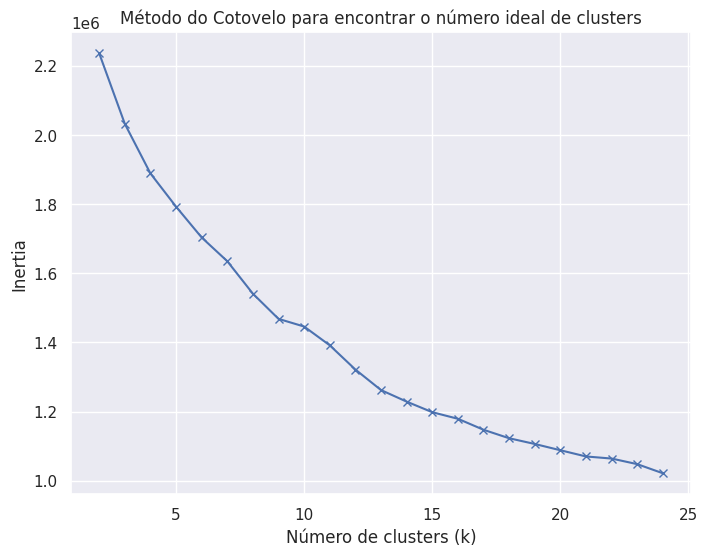

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/clus

Melhor n: 21 e melhor score: 0.1642404524648236


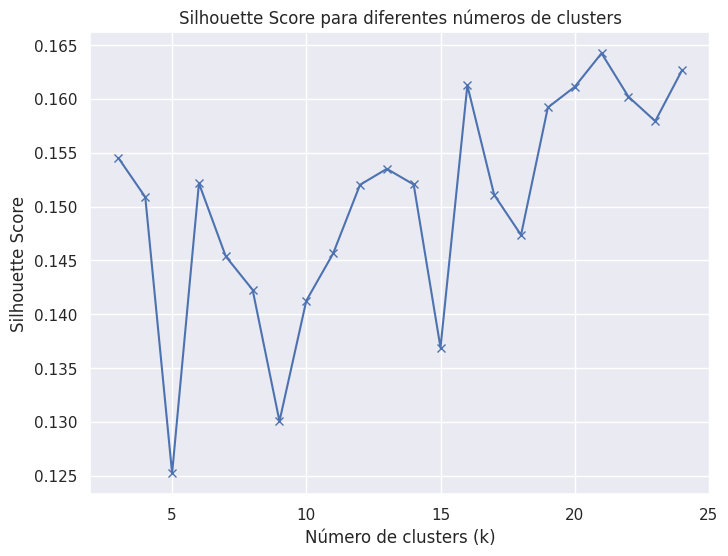

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Média da Pontuação de Silhueta para K-means: 0.1642404524648236


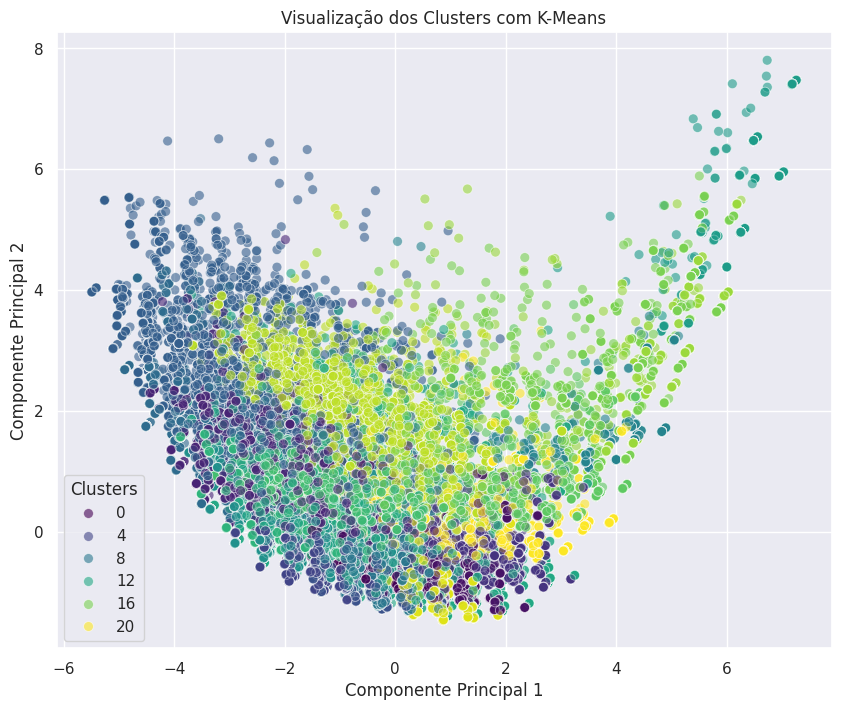

In [37]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Preparação dos dados
X_kmeans = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])

# Padronização dos dados
scaler = StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

# Determinando o número ideal de clusters com o Método do Cotovelo
inertia = []
K = range(2, 25)
for k in K:
    kmeans = KMeans(n_clusters=k, verbose=1)
    kmeans.fit(X_scaled_kmeans)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para encontrar o número ideal de clusters')
plt.show()

# Avaliando diferentes números de clusters usando Silhouette Score
silhouette_scores = []
best_n = None
best_score = -2

for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(X_scaled_kmeans)
    labels = kmeans.labels_
    silhouette_score_value = silhouette_score(X_scaled_kmeans, labels)
    silhouette_scores.append(silhouette_score_value)

    if silhouette_score_value > best_score:
        best_score = silhouette_score_value
        best_n = k

print(f'Melhor n: {best_n} e melhor score: {best_score}')

# Plotando o gráfico do Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K[1:], silhouette_scores, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.show()

# Treinando o modelo K-means com o número ideal de clusters
num_clusters = best_n  # Substituído pelo número ideal encontrado
kmeans = KMeans(n_clusters=num_clusters, random_state=13)
kmeans.fit(X_scaled_kmeans)

labels_kmeans = kmeans.predict(X_scaled_kmeans)
silhouette_avg_kmeans = silhouette_score(X_scaled_kmeans, labels_kmeans)
print("Média da Pontuação de Silhueta para K-means:", silhouette_avg_kmeans)

# Visualização dos clusters
# Utilizando PCA para reduzir a dimensionalidade para 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_kmeans)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='viridis', s=50, alpha=0.6)
plt.title('Visualização dos Clusters com K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clusters')
plt.show()


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 848671.9620121926.
Iteration 1, inertia 606378.2157491372.
Iteration 2, inertia 597932.4385807386.
Iteration 3, inertia 594030.0674339933.
Iteration 4, inertia 590215.6853165487.
Iteration 5, inertia 587636.7756808037.
Iteration 6, inertia 586465.8635109894.
Iteration 7, inertia 586032.1164785663.
Iteration 8, inertia 585843.4341927688.
Iteration 9, inertia 585767.0437026107.
Iteration 10, inertia 585731.2883562474.
Iteration 11, inertia 585710.2255256453.
Iteration 12, inertia 585695.3115687593.
Iteration 13, inertia 585681.4970221993.
Iteration 14, inertia 585674.1704406915.
Iteration 15, inertia 585670.3771760027.
Iteration 16, inertia 585668.1947744704.
Iteration 17, inertia 585665.3250539554.
Iteration 18, inertia 585663.8606481855.
Converged at iteration 18: center shift 8.951018349898028e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 1016148.2407357345.
Iteration 1, inertia 594949.1097932166.


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 737591.9198288111.
Iteration 1, inertia 564878.6733954749.
Iteration 2, inertia 548912.167647189.
Iteration 3, inertia 542768.6896885493.
Iteration 4, inertia 540198.1203219559.
Iteration 5, inertia 539062.592458893.
Iteration 6, inertia 538580.3585533368.
Iteration 7, inertia 538381.662557453.
Iteration 8, inertia 538218.9796272285.
Iteration 9, inertia 538108.6014535677.
Iteration 10, inertia 538063.3055251291.
Iteration 11, inertia 538046.4833549751.
Iteration 12, inertia 538035.5768961585.
Iteration 13, inertia 538027.5726236067.
Iteration 14, inertia 538025.8585157269.
Iteration 15, inertia 538024.1261512662.
Converged at iteration 15: center shift 4.7407769909965814e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 756750.128963805.
Iteration 1, inertia 564269.2547186496.
Iteration 2, inertia 549210.1134531986.
Iteration 3, inertia 543980.9290401214.
Iteration 4, inertia 540834.8404814865.
Iteration 5, inertia 538979.896

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 701844.0882155369.
Iteration 1, inertia 536142.972423794.
Iteration 2, inertia 525973.6814228602.
Iteration 3, inertia 520856.0321340271.
Iteration 4, inertia 520200.3081950324.
Iteration 5, inertia 520062.14549822913.
Iteration 6, inertia 520017.3174693303.
Iteration 7, inertia 519992.96776987053.
Iteration 8, inertia 519967.88822713913.
Iteration 9, inertia 519933.03929470794.
Iteration 10, inertia 519873.90610944445.
Iteration 11, inertia 519848.3882163444.
Iteration 12, inertia 519828.01800785895.
Iteration 13, inertia 519817.46370274527.
Iteration 14, inertia 519813.0105045894.
Iteration 15, inertia 519809.11451821204.
Iteration 16, inertia 519807.3056761079.
Iteration 17, inertia 519803.6649356766.
Iteration 18, inertia 519799.59214472026.
Iteration 19, inertia 519797.449522584.
Iteration 20, inertia 519788.97312118905.
Iteration 21, inertia 519768.64313266694.
Iteration 22, inertia 519729.43242458167.
Iteration 23, inertia 519685.5108025267.
Iteration 24, in

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 692824.5882401463.
Iteration 1, inertia 519581.8075269656.
Iteration 2, inertia 507740.5017575669.
Iteration 3, inertia 503124.95336704946.
Iteration 4, inertia 501384.4386173113.
Iteration 5, inertia 501249.42282930366.
Iteration 6, inertia 501215.39885630546.
Iteration 7, inertia 501182.3041117324.
Iteration 8, inertia 501146.0284171868.
Iteration 9, inertia 501124.57135149546.
Iteration 10, inertia 501118.09921291855.
Iteration 11, inertia 501116.4767070932.
Converged at iteration 11: center shift 7.016216331380372e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 680082.83181586.
Iteration 1, inertia 496589.0826017434.
Iteration 2, inertia 485037.5813368447.
Iteration 3, inertia 483670.50613065617.
Iteration 4, inertia 483511.59084745444.
Iteration 5, inertia 483491.4096957687.
Iteration 6, inertia 483487.34856378677.
Iteration 7, inertia 483486.04641318705.
Converged at iteration 7: center shift 7.713269857885615e-05 with

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 711714.7977772146.
Iteration 1, inertia 492291.2773064163.
Iteration 2, inertia 481193.7960621376.
Iteration 3, inertia 475475.76834940695.
Iteration 4, inertia 470392.66314829374.
Iteration 5, inertia 466846.363288948.
Iteration 6, inertia 464139.8450826857.
Iteration 7, inertia 463193.5936274947.
Iteration 8, inertia 463020.2062433652.
Iteration 9, inertia 462924.77586892934.
Iteration 10, inertia 462851.0338282693.
Iteration 11, inertia 462818.8502909872.
Iteration 12, inertia 462808.2516954303.
Iteration 13, inertia 462805.46184068127.
Iteration 14, inertia 462804.5668118282.
Converged at iteration 14: center shift 5.7127295689261755e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 712666.672177594.
Iteration 1, inertia 494609.69093443186.
Iteration 2, inertia 487462.7631732024.
Iteration 3, inertia 482616.1534914825.
Iteration 4, inertia 474288.73967239645.
Iteration 5, inertia 466817.12354741787.

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 461847.50931907794.
Iteration 2, inertia 452900.492946734.
Iteration 3, inertia 447749.7746942813.
Iteration 4, inertia 444526.23268338706.
Iteration 5, inertia 440965.1309835016.
Iteration 6, inertia 432927.19202298176.
Iteration 7, inertia 429038.9928089945.
Iteration 8, inertia 428242.57998791244.
Iteration 9, inertia 427902.48162141803.
Iteration 10, inertia 427757.80180763605.
Iteration 11, inertia 427702.19969013584.
Iteration 12, inertia 427651.45353535045.
Iteration 13, inertia 427596.62237812247.
Iteration 14, inertia 427571.6640432557.
Iteration 15, inertia 427564.4585983423.
Iteration 16, inertia 427558.55795810645.
Iteration 17, inertia 427556.5289451906.
Converged at iteration 17: center shift 9.308110787056463e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 667520.437487509.
Iteration 1, inertia 454585.8280260538.
Iteration 2, inertia 443613.47319191624.
Iteration 3, inertia 438635.088545927.
Iteration 4, inert

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 2, inertia 440655.67721346.
Iteration 3, inertia 436172.0297705405.
Iteration 4, inertia 432503.81287804164.
Iteration 5, inertia 431010.7737809903.
Iteration 6, inertia 428830.09267740557.
Iteration 7, inertia 426520.898890765.
Iteration 8, inertia 426310.3728798767.
Iteration 9, inertia 426238.7571930329.
Iteration 10, inertia 426214.08798816806.
Iteration 11, inertia 426210.976098019.
Converged at iteration 11: center shift 5.328910418489538e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 597286.8699277088.
Iteration 1, inertia 455301.12467413594.
Iteration 2, inertia 444259.4457955926.
Iteration 3, inertia 440315.51182958006.
Iteration 4, inertia 439048.01730712736.
Iteration 5, inertia 438235.7092872545.
Iteration 6, inertia 437815.5539353571.
Iteration 7, inertia 436484.1945335354.
Iteration 8, inertia 435533.3647000203.
Iteration 9, inertia 433900.46561774274.
Iteration 10, inertia 432671.30002057145.
Iteration 11, inertia 43187

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 571041.4795618596.
Iteration 1, inertia 435024.506888882.
Iteration 2, inertia 428257.0927834019.
Iteration 3, inertia 425750.7008651756.
Iteration 4, inertia 424506.79010269267.
Iteration 5, inertia 423409.9154337389.
Iteration 6, inertia 423062.70964730624.
Iteration 7, inertia 422592.67394647625.
Iteration 8, inertia 421690.39330899616.
Iteration 9, inertia 419282.44788990536.
Iteration 10, inertia 416254.9187859027.
Iteration 11, inertia 413477.80018137704.
Iteration 12, inertia 413042.4566445613.
Iteration 13, inertia 412737.2181727182.
Iteration 14, inertia 412376.66209204926.
Iteration 15, inertia 412095.22712727374.
Iteration 16, inertia 411868.09777651523.
Iteration 17, inertia 411420.8700583695.
Iteration 18, inertia 410760.59161868686.
Iteration 19, inertia 410330.0089676139.
Iteration 20, inertia 409935.049158747.
Iteration 21, inertia 409666.5694399185.
Iteration 22, inertia 409595.8403373549.
Iteration 23, inertia 409580.70901904546.
Iteration 24, ine

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 420151.9076158242.
Iteration 2, inertia 411742.8974942053.
Iteration 3, inertia 409749.2521303358.
Iteration 4, inertia 409226.588146757.
Iteration 5, inertia 408866.6026866812.
Iteration 6, inertia 408591.762136081.
Iteration 7, inertia 408285.92360179045.
Iteration 8, inertia 407965.3758083937.
Iteration 9, inertia 407486.1929564724.
Iteration 10, inertia 406994.378615079.
Iteration 11, inertia 406654.2667213215.
Iteration 12, inertia 406518.41219408263.
Iteration 13, inertia 406491.1819552118.
Iteration 14, inertia 406481.209667707.
Iteration 15, inertia 406471.0474742732.
Iteration 16, inertia 406464.93807351496.
Iteration 17, inertia 406459.1325614917.
Iteration 18, inertia 406444.44512105733.
Iteration 19, inertia 406433.31435048394.
Iteration 20, inertia 406428.2450040662.
Iteration 21, inertia 406427.58300893864.
Converged at iteration 21: center shift 8.738785045259924e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 540687.4963102939.
Iteration 1, inertia 388392.100624845.
Iteration 2, inertia 380534.35377820587.
Iteration 3, inertia 379828.2718836159.
Iteration 4, inertia 379469.56300704833.
Iteration 5, inertia 379292.08119086316.
Iteration 6, inertia 379193.84319108055.
Iteration 7, inertia 379170.3665546335.
Iteration 8, inertia 379162.78844945674.
Iteration 9, inertia 379160.6881013068.
Iteration 10, inertia 379155.8856643855.
Iteration 11, inertia 379139.98188404925.
Iteration 12, inertia 379130.43263856694.
Iteration 13, inertia 379128.7145037494.
Iteration 14, inertia 379127.4062672964.
Iteration 15, inertia 379126.21655694966.
Converged at iteration 15: center shift 6.387442135762982e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 583384.7822968597.
Iteration 1, inertia 411722.42800151184.
Iteration 2, inertia 402201.0681739379.
Iteration 3, inertia 394658.3800454534.
Iteration 4, inertia 389565.08111672144.
Iteration 5, inerti

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 389295.3727643385.
Iteration 2, inertia 378595.7164724451.
Iteration 3, inertia 376173.7041194439.
Iteration 4, inertia 374950.1471450458.
Iteration 5, inertia 373012.47022555774.
Iteration 6, inertia 371415.4094384096.
Iteration 7, inertia 370537.1377616341.
Iteration 8, inertia 370048.4510832762.
Iteration 9, inertia 369212.87402241025.
Iteration 10, inertia 367804.16035888717.
Iteration 11, inertia 365099.4651563731.
Iteration 12, inertia 363839.6414847936.
Iteration 13, inertia 363423.89870697685.
Iteration 14, inertia 363109.89519456157.
Iteration 15, inertia 362784.15950288164.
Iteration 16, inertia 362197.85260668583.
Iteration 17, inertia 361786.2683274265.
Iteration 18, inertia 360528.5600447125.
Iteration 19, inertia 359707.00670324086.
Iteration 20, inertia 359502.93995640834.
Iteration 21, inertia 359421.36666377576.
Iteration 22, inertia 359386.52871381765.
Iteration 23, inertia 359368.1859109235.
Iteration 24, inertia 359355.2114824387.
Iteration 25, 

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 390992.47019285965.
Iteration 2, inertia 376816.9067345974.
Iteration 3, inertia 368510.29778457445.
Iteration 4, inertia 363566.26089994726.
Iteration 5, inertia 358342.295052026.
Iteration 6, inertia 355460.9664122773.
Iteration 7, inertia 355255.9017008866.
Iteration 8, inertia 355121.65613269457.
Iteration 9, inertia 354770.17143900075.
Iteration 10, inertia 354588.1797160497.
Iteration 11, inertia 354535.935370374.
Iteration 12, inertia 354460.3920669017.
Iteration 13, inertia 354370.684053461.
Iteration 14, inertia 354330.9991006902.
Iteration 15, inertia 354318.02676014253.
Iteration 16, inertia 354312.2267364114.
Iteration 17, inertia 354309.2897726486.
Iteration 18, inertia 354308.21174485347.
Converged at iteration 18: center shift 9.201144584699605e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 500547.40097051876.
Iteration 1, inertia 379184.0283139794.
Iteration 2, inertia 373789.8636868136.
Iteration 3, inertia

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 14, inertia 337634.957631993.
Iteration 15, inertia 336120.348897361.
Iteration 16, inertia 335538.94125521055.
Iteration 17, inertia 335400.1723772556.
Iteration 18, inertia 335376.37314138963.
Iteration 19, inertia 335371.85204297845.
Converged at iteration 19: center shift 2.0853588469497932e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 502473.67909551313.
Iteration 1, inertia 342726.36481359915.
Iteration 2, inertia 331434.80438283965.
Iteration 3, inertia 328342.3538137602.
Iteration 4, inertia 327122.47993157915.
Iteration 5, inertia 326440.0109268848.
Iteration 6, inertia 324890.44182276895.
Iteration 7, inertia 324252.78669619036.
Iteration 8, inertia 324135.87987551617.
Iteration 9, inertia 324006.49447324267.
Iteration 10, inertia 323878.705886241.
Iteration 11, inertia 323674.2841960712.
Iteration 12, inertia 323583.51925616333.
Iteration 13, inertia 323560.40849601955.
Iteration 14, inertia 323555.1763849489.
Iteration 15

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 350287.0324314486.
Iteration 2, inertia 337154.2911187646.
Iteration 3, inertia 332319.1086099214.
Iteration 4, inertia 330801.4715680303.
Iteration 5, inertia 329492.9976914915.
Iteration 6, inertia 327793.2667338078.
Iteration 7, inertia 326343.74879856006.
Iteration 8, inertia 324994.8281141782.
Iteration 9, inertia 324712.69115661.
Iteration 10, inertia 324570.9998534762.
Iteration 11, inertia 323650.3981767565.
Iteration 12, inertia 322880.08949846367.
Iteration 13, inertia 322863.5142812126.
Iteration 14, inertia 322860.649918622.
Converged at iteration 14: center shift 9.641499817947835e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 499137.4508866761.
Iteration 1, inertia 354226.99037306214.
Iteration 2, inertia 342658.7256411668.
Iteration 3, inertia 339656.3876408693.
Iteration 4, inertia 338590.7540960101.
Iteration 5, inertia 338341.113005933.
Iteration 6, inertia 338157.33980704244.
Iteration 7, inertia 337792.7

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 474578.0031216853.
Iteration 1, inertia 331105.1536966269.
Iteration 2, inertia 323689.3833581214.
Iteration 3, inertia 320686.4277455682.
Iteration 4, inertia 318620.41442334244.
Iteration 5, inertia 316943.6873535237.
Iteration 6, inertia 315292.73447712185.
Iteration 7, inertia 314579.2505594463.
Iteration 8, inertia 313720.1546581544.
Iteration 9, inertia 312818.9326233722.
Iteration 10, inertia 312259.81935621484.
Iteration 11, inertia 311934.54771804065.
Iteration 12, inertia 311642.0274784949.
Iteration 13, inertia 311242.81591913966.
Iteration 14, inertia 310722.2344308909.
Iteration 15, inertia 310407.7096476512.
Iteration 16, inertia 310089.5760738455.
Iteration 17, inertia 309277.51475306944.
Iteration 18, inertia 308536.8090224344.
Iteration 19, inertia 308454.92180503614.
Iteration 20, inertia 308424.53249256656.
Iteration 21, inertia 308416.5682105579.
Iteration 22, inertia 308406.81744315365.
Iteration 23, inertia 308400.05415903684.
Iteration 24, in

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Iteration 1, inertia 332912.58187215315.
Iteration 2, inertia 326830.99696719303.
Iteration 3, inertia 325319.3330468838.
Iteration 4, inertia 323472.6809463688.
Iteration 5, inertia 322174.9999908574.
Iteration 6, inertia 321731.0609392641.
Iteration 7, inertia 321405.37196012866.
Iteration 8, inertia 321279.6256371711.
Iteration 9, inertia 321073.5915447683.
Iteration 10, inertia 320813.1031426802.
Iteration 11, inertia 319882.92054175236.
Iteration 12, inertia 318834.35178549343.
Iteration 13, inertia 318224.84761442814.
Iteration 14, inertia 317997.04471919284.
Iteration 15, inertia 317716.9670216647.
Iteration 16, inertia 317659.3660917259.
Iteration 17, inertia 317616.88295192184.
Iteration 18, inertia 317607.2819715115.
Iteration 19, inertia 317604.30322537443.
Iteration 20, inertia 317604.127420592.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 457890.732053641.
Iteration 1, inertia 329073.2743837907.
Iteration 2, inertia 317887.33

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 352061.180504651.
Iteration 2, inertia 344833.3978190849.
Iteration 3, inertia 342864.16797342536.
Iteration 4, inertia 341869.1246516553.
Iteration 5, inertia 340860.3588664844.
Iteration 6, inertia 339965.33745040395.
Iteration 7, inertia 339474.4105103316.
Iteration 8, inertia 339081.9384991238.
Iteration 9, inertia 338662.9559171693.
Iteration 10, inertia 338240.69123768667.
Iteration 11, inertia 337625.11117817566.
Iteration 12, inertia 335053.6879159735.
Iteration 13, inertia 325631.704380354.
Iteration 14, inertia 322544.04279014794.
Iteration 15, inertia 314152.7138523807.
Iteration 16, inertia 311686.4008756139.
Iteration 17, inertia 311199.6549307099.
Iteration 18, inertia 311124.19948512956.
Iteration 19, inertia 311087.55904297857.
Iteration 20, inertia 310897.9758809753.
Iteration 21, inertia 310393.5160081582.
Iteration 22, inertia 310209.3980721746.
Iteration 23, inertia 310177.0842344533.
Iteration 24, inertia 310163.10787184804.
Iteration 25, inert

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 438947.2359834525.
Iteration 1, inertia 325836.65569348563.
Iteration 2, inertia 314496.29501451424.
Iteration 3, inertia 310222.9721327821.
Iteration 4, inertia 308182.858852755.
Iteration 5, inertia 307194.740426798.
Iteration 6, inertia 306191.5155276166.
Iteration 7, inertia 305318.1328963313.
Iteration 8, inertia 304298.79433990375.
Iteration 9, inertia 302305.9607102104.
Iteration 10, inertia 300686.552404382.
Iteration 11, inertia 300488.3309810781.
Iteration 12, inertia 300393.1014748617.
Iteration 13, inertia 300362.60108869965.
Iteration 14, inertia 300328.83658443624.
Iteration 15, inertia 300282.9627850113.
Iteration 16, inertia 300267.714061669.
Iteration 17, inertia 300260.7076786227.
Iteration 18, inertia 300238.67103006825.
Iteration 19, inertia 300176.7107338236.
Iteration 20, inertia 300077.91399584.
Iteration 21, inertia 300037.1055978943.
Iteration 22, inertia 299988.67974247586.
Iteration 23, inertia 299882.15690119535.
Iteration 24, inertia 29

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 2, inertia 291217.1113047281.
Iteration 3, inertia 287310.18813608855.
Iteration 4, inertia 285472.75443016534.
Iteration 5, inertia 284880.3748150056.
Iteration 6, inertia 284606.06526178244.
Iteration 7, inertia 284518.11142282636.
Iteration 8, inertia 284472.113595457.
Iteration 9, inertia 284450.09983748826.
Iteration 10, inertia 284441.2836102985.
Iteration 11, inertia 284437.35421934514.
Iteration 12, inertia 284419.54924436583.
Iteration 13, inertia 284360.2922640451.
Iteration 14, inertia 284338.133093888.
Converged at iteration 14: center shift 4.8580192087807167e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 433222.7832205.
Iteration 1, inertia 310870.4900846456.
Iteration 2, inertia 300563.2293637835.
Iteration 3, inertia 298747.7943244204.
Iteration 4, inertia 297288.294307092.
Iteration 5, inertia 295343.3904465.
Iteration 6, inertia 294303.76704242884.
Iteration 7, inertia 293843.7098404213.
Iteration 8, inertia 293314.4

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 431399.5371670114.
Iteration 1, inertia 296917.07062020287.
Iteration 2, inertia 284814.6355868637.
Iteration 3, inertia 282904.91896796133.
Iteration 4, inertia 282345.1538114916.
Iteration 5, inertia 282072.3398783329.
Iteration 6, inertia 281899.5765378522.
Iteration 7, inertia 281727.24105341.
Iteration 8, inertia 281681.0668107265.
Iteration 9, inertia 281601.0551803618.
Iteration 10, inertia 281560.0911191067.
Iteration 11, inertia 281510.56186024006.
Iteration 12, inertia 281498.23947898706.
Iteration 13, inertia 281491.67237104825.
Iteration 14, inertia 281487.50308979285.
Iteration 15, inertia 281484.9275856008.
Iteration 16, inertia 281472.1287253662.
Iteration 17, inertia 281457.35694324115.
Iteration 18, inertia 281429.7194797435.
Iteration 19, inertia 281330.70392437035.
Iteration 20, inertia 281262.53443638.
Iteration 21, inertia 281246.9121003651.
Iteration 22, inertia 281241.67585234635.
Iteration 23, inertia 281237.374381228

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 434125.8959245564.
Iteration 1, inertia 301947.6670405974.
Iteration 2, inertia 285918.55687094724.
Iteration 3, inertia 281191.3462204027.
Iteration 4, inertia 279286.0382035916.
Iteration 5, inertia 278504.35389732086.
Iteration 6, inertia 277819.1064984439.
Iteration 7, inertia 277562.19080136396.
Iteration 8, inertia 277257.3300998572.
Iteration 9, inertia 277165.8897938904.
Iteration 10, inertia 277131.3943161355.
Iteration 11, inertia 277109.08509228117.
Iteration 12, inertia 276926.60992927325.
Iteration 13, inertia 276870.9412783825.
Iteration 14, inertia 276833.86304872285.
Iteration 15, inertia 276809.2284682559.
Iteration 16, inertia 276799.8877205921.
Iteration 17, inertia 276798.4739840162.
Iteration 18, inertia 276797.4435569059.
Converged at iteration 18: center shift 6.538273008355858e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 420906.4478363987.
Iteration 1, inertia 301920.00624951575.
Iteration 2, inert

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 401108.0492151864.
Iteration 1, inertia 294714.5809265478.
Iteration 2, inertia 284256.5213220646.
Iteration 3, inertia 279882.95156079583.
Iteration 4, inertia 277577.41074266343.
Iteration 5, inertia 276192.2273967896.
Iteration 6, inertia 275840.2625770038.
Iteration 7, inertia 275670.94660340843.
Iteration 8, inertia 275516.31369242485.
Iteration 9, inertia 275409.46471419826.
Iteration 10, inertia 275240.43201076856.
Iteration 11, inertia 275158.55040011206.
Iteration 12, inertia 275124.3878136743.
Iteration 13, inertia 275092.8441983305.
Iteration 14, inertia 275050.0975972097.
Iteration 15, inertia 275037.2542177787.
Iteration 16, inertia 275035.9853617675.
Iteration 17, inertia 275034.1242375821.
Iteration 18, inertia 275029.9237126827.
Iteration 19, inertia 275025.54781662754.
Iteration 20, inertia 275019.86828920763.
Iteration 21, inertia 274981.19589629216.
Iteration 22, inertia 274930.0567805186.
Iteration 23, inertia 274896.20716663956.
Iteration 24, i

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 415561.0347491659.
Iteration 1, inertia 285130.52307396836.
Iteration 2, inertia 276928.63680676266.
Iteration 3, inertia 275190.9274630016.
Iteration 4, inertia 274046.91942237027.
Iteration 5, inertia 273275.2821663357.
Iteration 6, inertia 271591.78592863097.
Iteration 7, inertia 271269.51176291675.
Iteration 8, inertia 270589.830635308.
Iteration 9, inertia 269626.6700180408.
Iteration 10, inertia 269579.2615318339.
Iteration 11, inertia 269349.76064723043.
Iteration 12, inertia 269314.477075611.
Iteration 13, inertia 269278.2911897428.
Iteration 14, inertia 269255.7239509728.
Iteration 15, inertia 269253.3584790905.
Iteration 16, inertia 269252.69639641716.
Iteration 17, inertia 269250.0843725316.
Iteration 18, inertia 269248.7645729028.
Iteration 19, inertia 269248.2504210047.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 399318.1713528851.
Iteration 1, inertia 291163.3087395372.
Iteration 

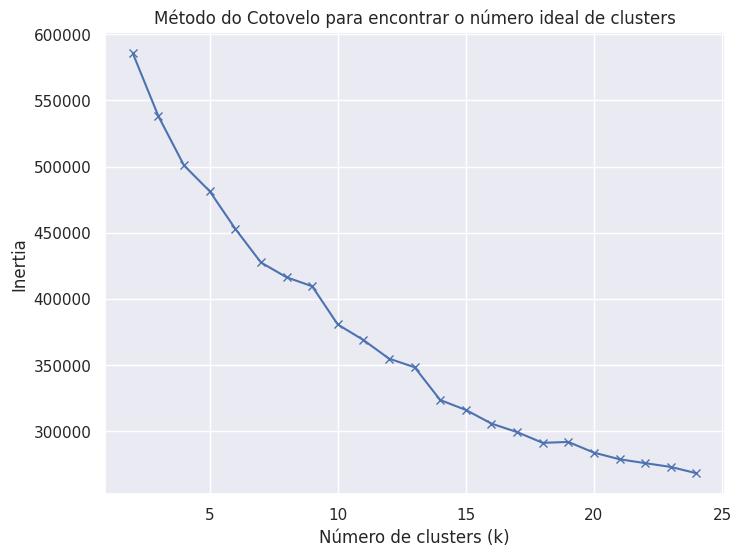

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/clus

Melhor n: 7 e melhor score: 0.15558273755250907


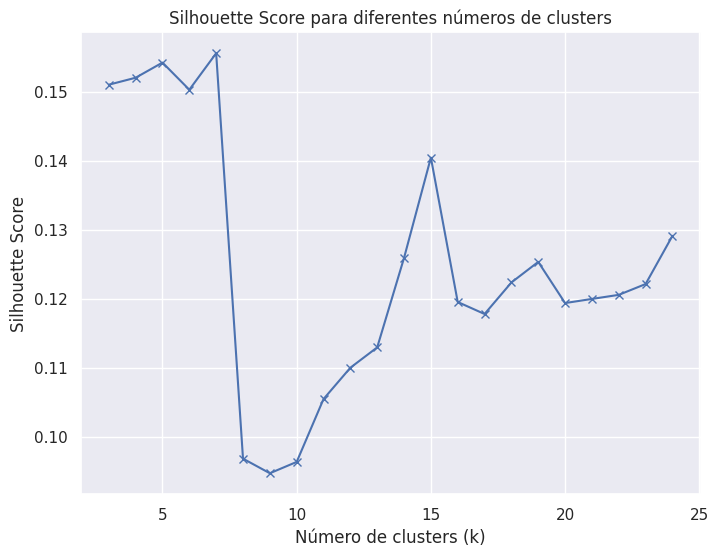

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Média da Pontuação de Silhueta para K-means: 0.15558273755250907


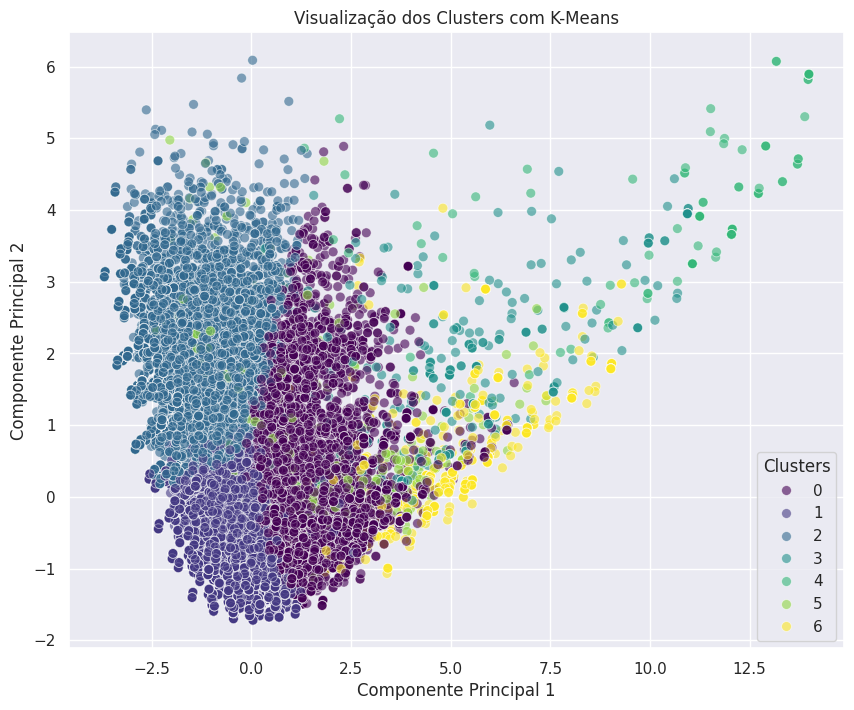

In [39]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Preparação dos dados
X_kmeans = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])

# Padronização dos dados
scaler = StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

# Determinando o número ideal de clusters com o Método do Cotovelo
inertia = []
K = range(2, 25)
for k in K:
    kmeans = KMeans(n_clusters=k, verbose=1)
    kmeans.fit(X_scaled_kmeans)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para encontrar o número ideal de clusters')
plt.show()

# Avaliando diferentes números de clusters usando Silhouette Score
silhouette_scores = []
best_n = None
best_score = -2

for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(X_scaled_kmeans)
    labels = kmeans.labels_
    silhouette_score_value = silhouette_score(X_scaled_kmeans, labels)
    silhouette_scores.append(silhouette_score_value)

    if silhouette_score_value > best_score:
        best_score = silhouette_score_value
        best_n = k

print(f'Melhor n: {best_n} e melhor score: {best_score}')

# Plotando o gráfico do Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K[1:], silhouette_scores, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.show()

# Treinando o modelo K-means com o número ideal de clusters
num_clusters = best_n  # Substituído pelo número ideal encontrado
kmeans = KMeans(n_clusters=num_clusters, random_state=13)
kmeans.fit(X_scaled_kmeans)

labels_kmeans = kmeans.predict(X_scaled_kmeans)
silhouette_avg_kmeans = silhouette_score(X_scaled_kmeans, labels_kmeans)
print("Média da Pontuação de Silhueta para K-means:", silhouette_avg_kmeans)

# Visualização dos clusters
# Utilizando PCA para reduzir a dimensionalidade para 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_kmeans)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='viridis', s=50, alpha=0.6)
plt.title('Visualização dos Clusters com K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clusters')
plt.show()


### Random Search

In [44]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV

# Preparação dos dados
X_kmeans = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])
y_kmeans = df_microdados_fund['CLASSE_ABAND']  # Variável alvo para comparação

# Padronização dos dados
scaler = StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

# Função customizada para calcular Silhouette Score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Parâmetros para RandomizedSearchCV
param_distributions = {'n_clusters': range(3, 20)}

# RandomizedSearchCV para KMeans
random_search_kmeans = RandomizedSearchCV(
    KMeans(n_init=10),
    param_distributions,
    n_iter=10,
    scoring=silhouette_scorer,
    verbose=1  # Para acompanhar a execução
)
random_search_kmeans.fit(X_scaled_kmeans)

# Melhor modelo
best_kmeans = random_search_kmeans.best_estimator_
print(f'Melhor número de clusters: {best_kmeans.n_clusters}')

# Score do melhor modelo
best_score = random_search_kmeans.best_score_
print(f'Silhouette Score do melhor modelo: {best_score}')

# Previsão dos clusters
labels_kmeans = best_kmeans.predict(X_scaled_kmeans)

# Adicionar os labels dos clusters ao DataFrame original
df_clusters = df_microdados_fund.copy()
df_clusters['Cluster'] = labels_kmeans

# Comparar os clusters com a variável alvo
cluster_summary = df_clusters.groupby(['Cluster', 'CLASSE_ABAND']).size().unstack(fill_value=0)

print("Resumo dos clusters comparado com a variável alvo:")
print(cluster_summary)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhor número de clusters: 14
Resumo dos clusters comparado com a variável alvo:
CLASSE_ABAND  Muito Baixo  Baixo  Médio  Alto  Muito Alto
Cluster                                                  
0                    3643    315    396   353         388
1                    8564   1094   1106   888         710
2                    2058     49    118   262         678
3                    5419   1360   1301  1067         589
4                    7839   1663   1644  1259         824
5                    4372    227    281   200         134
6                    3442    247    135    97          71
7                    1871     34     99   184         654
8                   15747   1072   1973  2361        2733
9                    7846    105    344   691        1585
10                   6491   1313   1273  1057         759
11                   5880   1211    998   654         391
12                   5318    938    754   489 

In [46]:
random_search_kmeans.best_score_

0.1696317576935236

# DBScam

In [38]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Preparação dos dados
X_dbscan = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])

# Padronização dos dados
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(X_dbscan)

# Criar e ajustar o modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # você pode ajustar os parâmetros eps e min_samples conforme necessário
labels_dbscan = dbscan.fit_predict(X_scaled_dbscan)

# Avaliação usando a pontuação de silhueta (somente se houver mais de um cluster)
if len(set(labels_dbscan)) > 1:
    silhouette_avg_dbscan = silhouette_score(X_scaled_dbscan, labels_dbscan)
    print("Média da Pontuação de Silhueta para DBSCAN:", silhouette_avg_dbscan)
else:
    print("DBSCAN não encontrou clusters significativos.")

# Contagem de pontos por cluster
unique, counts = np.unique(labels_dbscan, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Contagem de pontos por cluster:", cluster_counts)


Média da Pontuação de Silhueta para DBSCAN: 0.6940217576587803
Contagem de pontos por cluster: {-1: 22018, 0: 444, 1: 2114, 2: 23, 3: 369, 4: 176, 5: 33, 6: 244, 7: 42, 8: 13, 9: 5, 10: 23, 11: 525, 12: 13, 13: 32, 14: 1035, 15: 9, 16: 111, 17: 1124, 18: 160, 19: 53, 20: 183, 21: 334, 22: 9, 23: 156, 24: 28, 25: 28, 26: 20, 27: 46, 28: 87, 29: 226, 30: 75, 31: 85, 32: 43, 33: 30, 34: 121, 35: 31, 36: 121, 37: 107, 38: 120, 39: 119, 40: 11, 41: 36, 42: 9, 43: 16, 44: 11, 45: 45, 46: 82, 47: 9, 48: 12, 49: 12, 50: 43, 51: 15, 52: 23, 53: 28, 54: 20, 55: 78, 56: 302, 57: 749, 58: 442, 59: 7, 60: 10, 61: 36, 62: 13, 63: 68, 64: 11, 65: 144, 66: 150, 67: 14, 68: 698, 69: 34, 70: 69, 71: 139, 72: 19, 73: 10, 74: 13, 75: 158, 76: 60, 77: 138, 78: 184, 79: 56, 80: 22, 81: 125, 82: 8, 83: 163, 84: 120, 85: 13, 86: 7, 87: 87, 88: 8, 89: 102, 90: 103, 91: 41, 92: 71, 93: 128, 94: 1103, 95: 29, 96: 134, 97: 23, 98: 71, 99: 34, 100: 1006, 101: 32, 102: 63, 103: 182, 104: 101, 105: 42, 106: 60, 107:

### Melhoria do DBSCam

Melhor parâmetro eps: 0.1
Melhor parâmetro min_samples: 650
Melhor Silhouette Score: -0.09779179865721677
Contagem de pontos por cluster: {-1: 107401, 0: 2114, 1: 1035, 2: 1124, 3: 749, 4: 698, 5: 1103, 6: 1006, 7: 2072, 8: 839, 9: 732, 10: 868, 11: 1115}
Número de clusters encontrados: 12


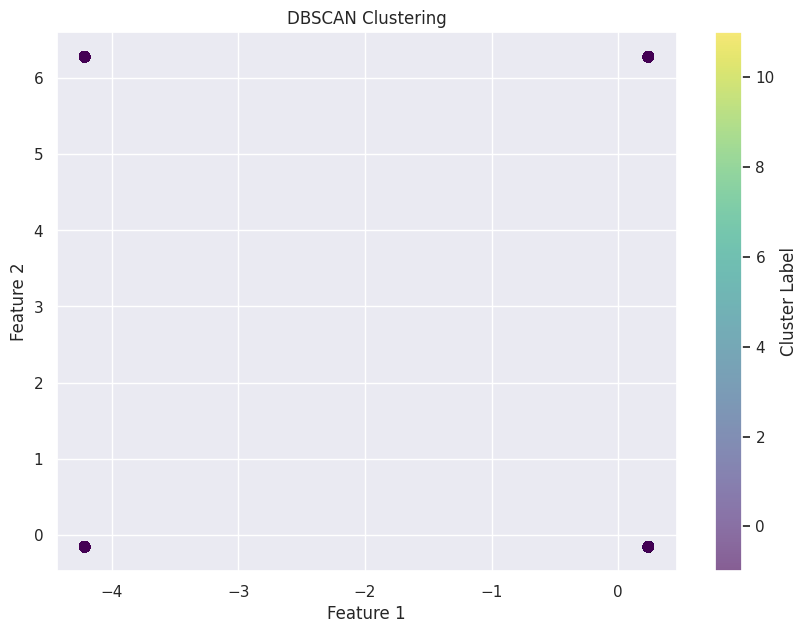

Resumo dos clusters comparado com a variável alvo:
CLASSE_ABAND  Muito Baixo  Baixo  Médio  Alto  Muito Alto
Cluster                                                  
-1                  70247   9412   9853  8729        9160
 0                   1724      3     23    86         278
 1                    815      8     30    66         116
 2                    791     15     64   115         139
 3                    591      9     38    39          72
 4                    529     27     48    50          44
 5                    754     36    100   113         100
 6                    704     23     56    82         141
 7                   1613      4     28   106         321
 8                    531     43     66    94         105
 9                    570      3     21    44          94
 10                   663      6     33    54         112
 11                   718     45     88   137         127


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Preparação dos dados
X_dbscan = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])

# Padronização dos dados
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(X_dbscan)

# Definindo uma grade de parâmetros para DBSCAN
param_grid = {
    'eps': np.linspace(0.1, 1.5, 10),
    'min_samples': range(500, 1000, 150)
}

best_score = -1
best_params = None
best_labels = None

# Busca por grade
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_scaled_dbscan)
    
    if len(set(labels)) > 1:  # Considerar apenas se há mais de um cluster
        score = silhouette_score(X_scaled_dbscan, labels)
        if score > best_score:
            best_score = score
            best_params = params
            best_labels = labels

print(f"Melhor parâmetro eps: {best_params['eps']}")
print(f"Melhor parâmetro min_samples: {best_params['min_samples']}")
print(f"Melhor Silhouette Score: {best_score}")

# Contagem de pontos por cluster
unique, counts = np.unique(best_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Contagem de pontos por cluster:", cluster_counts)

# Número de clusters encontrados (excluindo ruído, se presente)
num_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f"Número de clusters encontrados: {num_clusters}")

# Visualização dos clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled_dbscan[:, 0], X_scaled_dbscan[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Adicionar os labels dos clusters ao DataFrame original
df_clusters_dbscan = df_microdados_fund.copy()
df_clusters_dbscan['Cluster'] = best_labels

# Comparar os clusters com a variável alvo
cluster_summary_dbscan = df_clusters_dbscan.groupby(['Cluster', 'CLASSE_ABAND']).size().unstack(fill_value=0)

print("Resumo dos clusters comparado com a variável alvo:")
print(cluster_summary_dbscan)


Melhor parâmetro eps: 0.7222222222222222
Melhor parâmetro min_samples: 500
Melhor Silhouette Score: -0.19709027854445477
Contagem de pontos por cluster: {-1: 28691, 0: 693}
Número de clusters encontrados: 1


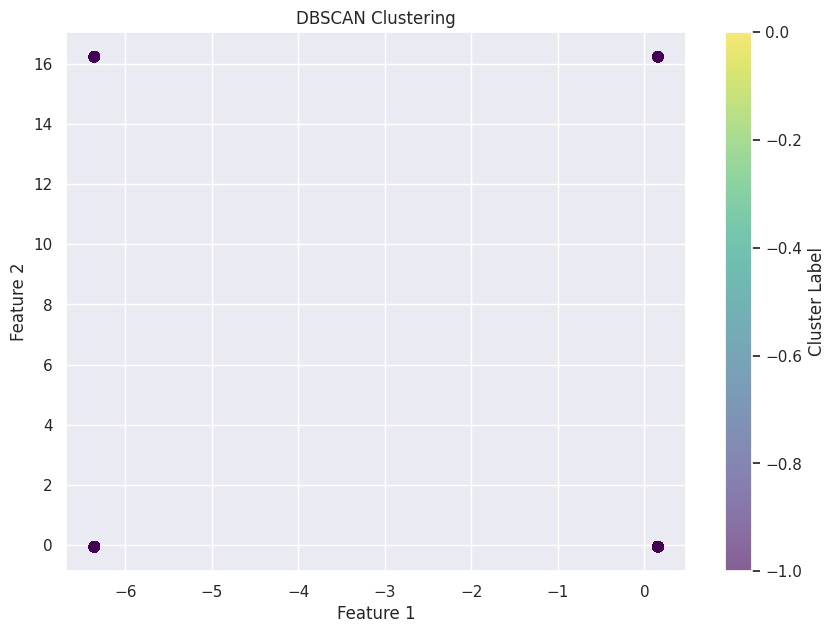

Resumo dos clusters comparado com a variável alvo:
CLASSE_ABAND  Muito Baixo  Baixo  Médio  Alto  Muito Alto
Cluster                                                  
-1                  12564   3942   4030  3892        4263
 0                    146    129    142   155         121


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Preparação dos dados
X_dbscan = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])

# Padronização dos dados
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(X_dbscan)

# Definindo uma grade de parâmetros para DBSCAN
param_grid = {
    'eps': np.linspace(0.1, 1.5, 10),
    'min_samples': range(500, 1000, 150)
}

best_score = -1
best_params = None
best_labels = None

# Busca por grade
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_scaled_dbscan)
    
    if len(set(labels)) > 1:  # Considerar apenas se há mais de um cluster
        score = silhouette_score(X_scaled_dbscan, labels)
        if score > best_score:
            best_score = score
            best_params = params
            best_labels = labels

print(f"Melhor parâmetro eps: {best_params['eps']}")
print(f"Melhor parâmetro min_samples: {best_params['min_samples']}")
print(f"Melhor Silhouette Score: {best_score}")

# Contagem de pontos por cluster
unique, counts = np.unique(best_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Contagem de pontos por cluster:", cluster_counts)

# Número de clusters encontrados (excluindo ruído, se presente)
num_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f"Número de clusters encontrados: {num_clusters}")

# Visualização dos clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled_dbscan[:, 0], X_scaled_dbscan[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Adicionar os labels dos clusters ao DataFrame original
df_clusters_dbscan = df_microdados_med.copy()
df_clusters_dbscan['Cluster'] = best_labels

# Comparar os clusters com a variável alvo
cluster_summary_dbscan = df_clusters_dbscan.groupby(['Cluster', 'CLASSE_ABAND']).size().unstack(fill_value=0)

print("Resumo dos clusters comparado com a variável alvo:")
print(cluster_summary_dbscan)


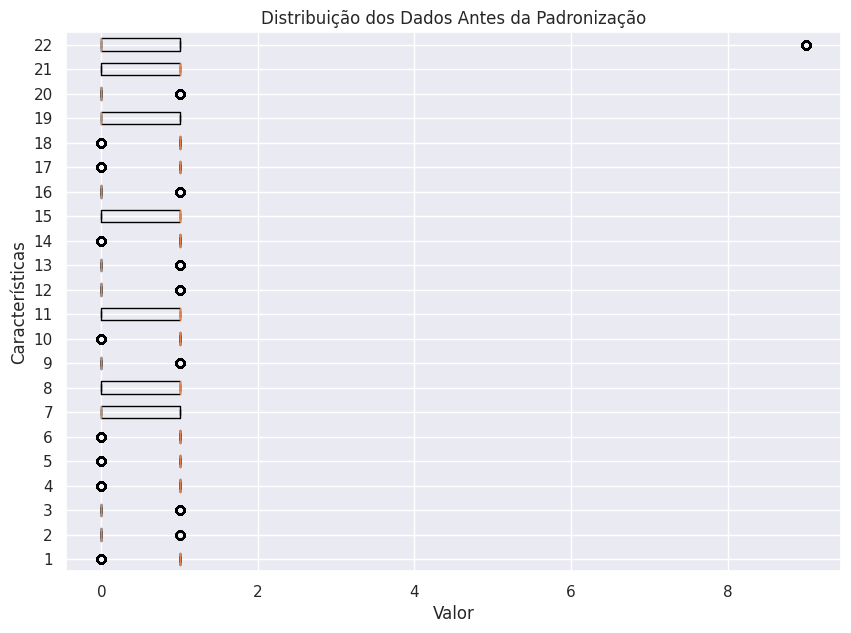

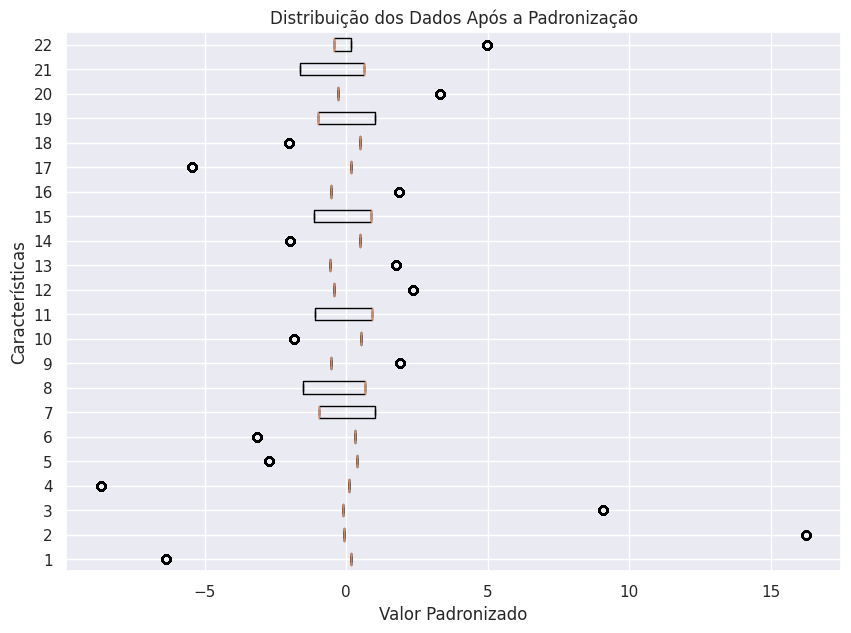

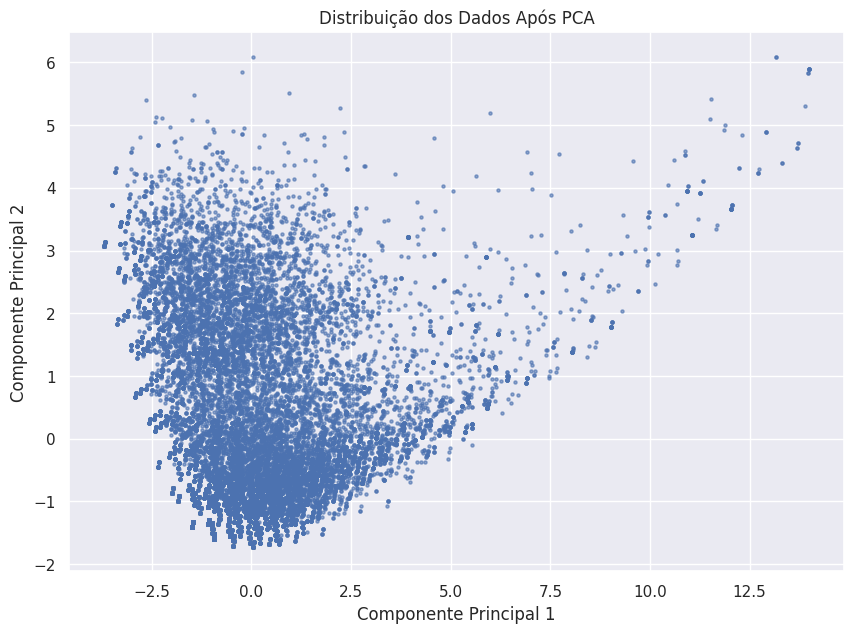

Melhor parâmetro eps: 1.7
Melhor parâmetro min_samples: 50
Melhor Silhouette Score: 0.8099801640252327
Contagem de pontos por cluster: {-1: 8, 0: 29376}
Número de clusters encontrados: 1


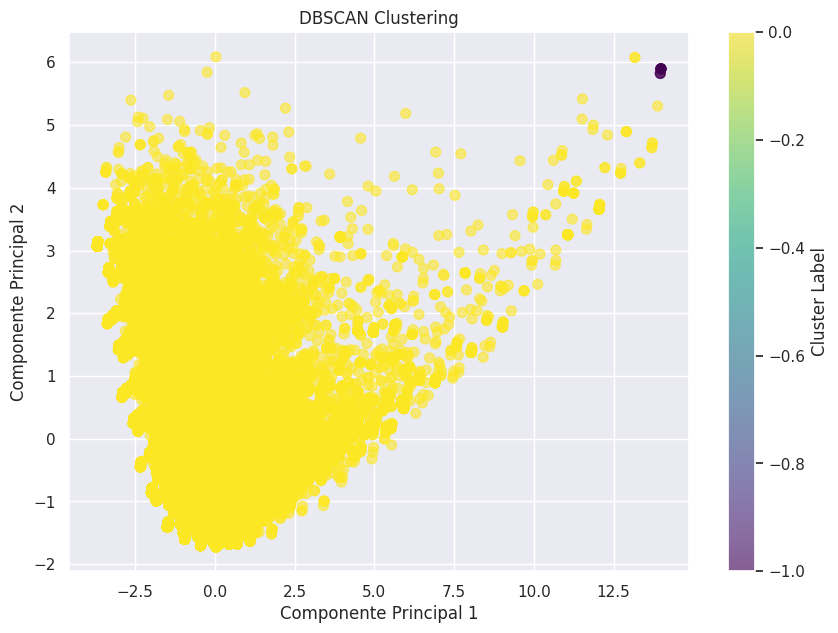

Resumo dos clusters comparado com a variável alvo:
CLASSE_ABAND  Muito Baixo  Baixo  Médio  Alto  Muito Alto
Cluster                                                  
-1                      3      0      2     0           3
 0                  12707   4071   4170  4047        4381


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA

# Preparação dos dados
X_dbscan = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])

# Visualização da distribuição dos dados antes da padronização
plt.figure(figsize=(10, 7))
plt.boxplot(X_dbscan, vert=False)
plt.title('Distribuição dos Dados Antes da Padronização')
plt.xlabel('Valor')
plt.ylabel('Características')
plt.show()

# Padronização dos dados
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(X_dbscan)

# Visualização da distribuição dos dados após a padronização
plt.figure(figsize=(10, 7))
plt.boxplot(X_scaled_dbscan, vert=False)
plt.title('Distribuição dos Dados Após a Padronização')
plt.xlabel('Valor Padronizado')
plt.ylabel('Características')
plt.show()

# Redução de dimensionalidade com PCA para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_dbscan)

# Visualização dos dados após PCA
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, alpha=0.6)
plt.title('Distribuição dos Dados Após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Definindo uma grade de parâmetros para DBSCAN
param_grid = {
    'eps': np.linspace(0.1, 2.0, 20),  # Aumentar o intervalo de eps
    'min_samples': range(50, 1000, 100)  # Ajustar min_samples
}

best_score = -1
best_params = None
best_labels = None

# Busca por grade
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_pca)
    
    if len(set(labels)) > 1:  # Considerar apenas se há mais de um cluster
        score = silhouette_score(X_pca, labels)
        if score > best_score:
            best_score = score
            best_params = params
            best_labels = labels

print(f"Melhor parâmetro eps: {best_params['eps']}")
print(f"Melhor parâmetro min_samples: {best_params['min_samples']}")
print(f"Melhor Silhouette Score: {best_score}")

# Contagem de pontos por cluster
unique, counts = np.unique(best_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Contagem de pontos por cluster:", cluster_counts)

# Número de clusters encontrados (excluindo ruído, se presente)
num_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f"Número de clusters encontrados: {num_clusters}")

# Visualização dos clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Adicionar os labels dos clusters ao DataFrame original
df_clusters_dbscan = df_microdados_med.copy()
df_clusters_dbscan['Cluster'] = best_labels

# Comparar os clusters com a variável alvo
cluster_summary_dbscan = df_clusters_dbscan.groupby(['Cluster', 'CLASSE_ABAND']).size().unstack(fill_value=0)

print("Resumo dos clusters comparado com a variável alvo:")
print(cluster_summary_dbscan)
